<a href="https://colab.research.google.com/github/Vivian-N0826/Understanding-Customer-Sentiments-A-Deep-Dive-into-Electronics-Camera-Reviews/blob/main/9166_LinxuanNIE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0.&nbsp;First install/load the packages

In [ ]:
!pip install datasets
import pandas as pd

import datasets
datasets.logging.set_verbosity_error()

from datasets import load_dataset

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is

# 1.Extract the Camera sub-dataset
## 1.1&nbsp;Next load the review dataset from HuggingFace for "Electronics"

In [ ]:
dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_Electronics", trust_remote_code=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/30.3k [00:00<?, ?B/s]

Amazon-Reviews-2023.py:   0%|          | 0.00/39.6k [00:00<?, ?B/s]

Electronics.jsonl:   0%|          | 0.00/22.6G [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

Loading dataset shards:   0%|          | 0/34 [00:00<?, ?it/s]

In [ ]:
# After loading, take a look at one entry
dataset['full'][0]

{'rating': 3.0,
 'title': 'Smells like gasoline! Going back!',
 'text': 'First & most offensive: they reek of gasoline so if you are sensitive/allergic to petroleum products like I am you will want to pass on these.  Second: the phone adapter is useless as-is. Mine was not drilled far enough to be able to tighten it into place for my iPhone 12 max. It just slipped & slid all over. Stupid me putting the adapter together first without picking up the binoculars to smell them bc I wasted 15 minutes trying to figure out how to put the adapter together bc it does not come with instructions!  I had to come back here to the website which was a total pain. Third: the tripod is also useless. I would not trust the iOS to hold my $1600 phone nor even a Mattel Barbie for that matter. It’s just inefficient for the job imo.  Third: in order to try to give an honest review I did don gloves & eyewear to check the binoculars out.  They seemed average except for mine seemed to be missing about 10% of the

## 1.2.&nbsp;Next load the meta datafile from HuggingFace for "Electronics"

In [ ]:
metaset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_Electronics", split="full", trust_remote_code=True)

meta_Electronics.jsonl:   0%|          | 0.00/5.25G [00:00<?, ?B/s]

Generating full split:   0%|          | 0/1610012 [00:00<?, ? examples/s]

In [ ]:
# Again check an entry
metaset[0]

{'main_category': 'All Electronics',
 'title': 'FS-1051 FATSHARK TELEPORTER V3 HEADSET',
 'average_rating': 3.5,
 'rating_number': 6,
 'features': [],
 'description': ['Teleporter V3 The “Teleporter V3” kit sets a new level of value in the FPV world with Fat Shark renowned performance and quality. The fun of FPV is experienced firsthand through the large screen FPV headset with integrated NexwaveRF receiver technology while simultaneously recording onboard HD footage with the included “PilotHD” camera. The “Teleporter V3” kit comes complete with everything you need to step into the cockpit of your FPV vehicle. We’ve included our powerful 250mW 5.8Ghz transmitter, 25 degree FOV headset (largest QVGA display available), the brand new “PilotHD” camera with live AV out and all the cables, antennas and connectors needed.'],
 'price': 'None',
 'images': {'hi_res': [None],
  'large': ['https://m.media-amazon.com/images/I/41qrX56lsYL._AC_.jpg'],
  'thumb': ['https://m.media-amazon.com/images/I

## 1.3.&nbsp;Now the relevant "parent_asin" for later analysis could be filtered from the meta data.

In [ ]:
myMetaSub = metaset.filter(lambda example: 'camera' in example['title'])

Filter:   0%|          | 0/1610012 [00:00<?, ? examples/s]

In [ ]:
len(myMetaSub)

2129

In [ ]:
myMetaSub[0]

{'main_category': 'Camera & Photo',
 'title': 'Original MH-63 Battery Charger fits Nikon EN-EL10 Batteries (with Power Cord) for Ge camera',
 'average_rating': 2.9,
 'rating_number': 3,
 'features': [],
 'description': ["Original MH-63 Battery Charger fits Nikon EN-EL10 Batteries (with Power Cord) for Ge camera . This Nikon MH-63 Original Battery Charger for EN-EL10 Li-Ion Batteries is for you to use to quickly and reliably charge the compatible batteries for your digital devices. Use this battery charger to easily charge your device's battery at home, in the office and keep your digital device for use.FEATURES: Compact and solid design and make with Original reliable quality Quickly and reliably charge your digital batteries With intelligent IC chip to prevent over-charging With Fold-out plugs on the back for easy storage As simple as plugging the unit in to the wall and inserting a battery, yet is small enough to take anywhere. SPECIFICATIONS: Original part#: Nikon MH-63Compatible ba

In [ ]:
# Now get all the "parent_asin" numbers to match with the review data
myMetaSubASIN = myMetaSub['parent_asin']

## 1.4.&nbsp;Now subset the review data according to the "parent_asin" filtered above from the meta data

In [ ]:
mySubset = dataset.filter(lambda example: example['parent_asin'] in myMetaSubASIN)

Filter:   0%|          | 0/43886944 [00:00<?, ? examples/s]

In [ ]:
# Check how many reviews we have
len(mySubset['full'])

148186

In [ ]:
# Now convert both subsets to pandas dataframes
myReviewSubDF = pd.DataFrame(mySubset['full'])
myMetaSubDF = pd.DataFrame(myMetaSub)

## 1.5.&nbsp;Now combine both review data and meta data for this

In [ ]:
myDF = myReviewSubDF.merge(myMetaSubDF, on='parent_asin', how='left')

In [ ]:
# Take a look
myDF.head()

rating                             title_x  \
0     5.0                        So much fun!   
1     5.0                  Had to swap it out   
2     5.0                       outdoor blink   
3     5.0                             Blink 2   
4     3.0  nice hardware but software no good   

                                                text images_x        asin  \
0  Bought this for my Sister. She have 5 feral ca...       []  B086DKSYTS   
1  This isn't my first Evho. I wanted another one...       []  B08J8FFJ8H   
2  We purchased these to put inside - which we no...       []  B086DKMSSM   
3  We own many of these... this set is for our da...       []  B07MMZF2BF   
4  Hardware is great but the software is terrible...       []  B00P7EVST6   

  parent_asin                       user_id      timestamp  helpful_vote  \
0  B08F6GPRH6  AE7Y5RLYIKHOZB5NKKOEKYG2SPSQ  1677189845500             0   
1  B08XVF418R  AFGEM6BXCYHUILEOA3P2ZYBEF2TA  1675535156280             0   
2  B08F6GPRH6  AFZUK3MTBIBEDQOPAK3OATUOUKLA  1602891062298            14   
3  B07N86MCD2  AFZUK3MTBIBEDQOPAK3OATUOUKLA  1579717984046             0   
4  B00P7EVST6  AGEP2CC2QIJU5IHQZXCC7BE5JSDQ  1514136440116             0   

   verified_purchase  ...                                        description  \
0              False  ...                                                 []   
1               True  ...                                                 []   
2               True  ...                                                 []   
3               True  ...                                                 []   
4               True  ...  [Arlo Smart Home Security Cameras are the worl...   

    price                                           images_y  \
0  219.96  {'hi_res': ['https://m.media-amazon.com/images...   
1    None  {'hi_res': ['https://m.media-amazon.com/images...   
2  219.96  {'hi_res': ['https://m.media-amazon.com/images...   
3   99.99  {'hi_res': ['https://m.media-amazon.com/images...   
4    None  {'hi_res': ['https://m.media-amazon.com/images...   

                                              videos   store  \
0  {'title': ['Wireless, easy setup, great batter...   Blink   
1  {'title': ['An Overview: Echo Show 5, 2nd Gen,...  Amazon   
2  {'title': ['Wireless, easy setup, great batter...   Blink   
3  {'title': ['Blink XT2 Full Review - Batteries ...   Blink   
4  {'title': ['Easy setup, laggy detection', 'Arl...    Arlo   

                                          categories  \
0                                                 []   
1                                                 []   
2                                                 []   
3                                                 []   
4  [Electronics, Security & Surveillance, Home Se...   

                                             details bought_together subtitle  \
0                                                 {}            None     None   
1                                                 {}            None     None   
2                                                 {}            None     None   
3                                                 {}            None     None   
4  {"Brand": "Arlo", "Color": "White", "Power Sou...            None     None   

  author  
0   None  
1   None  
2   None  
3   None  
4   None  

[5 rows x 25 columns]

from matplotlib import pyplot as plt
_df_0['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['timestamp'].plot(kind='hist', bins=20, title='timestamp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['helpful_vote'].plot(kind='hist', bins=20, title='helpful_vote')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['average_rating'].plot(kind='hist', bins=20, title='average_rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('title_x').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('asin').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('parent_asin').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='rating', y='timestamp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='timestamp', y='helpful_vote', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='helpful_vote', y='average_rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='average_rating', y='rating_number', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('title_x')):
  _plot_series(series, series_name, i)
  fig.legend(title='title_x', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('text')):
  _plot_series(series, series_name, i)
  fig.legend(title='text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('asin')):
  _plot_series(series, series_name, i)
  fig.legend(title='asin', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('parent_asin')):
  _plot_series(series, series_name, i)
  fig.legend(title='parent_asin', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('rating')

from matplotlib import pyplot as plt
_df_16['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['timestamp'].plot(kind='line', figsize=(8, 4), title='timestamp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['helpful_vote'].plot(kind='line', figsize=(8, 4), title='helpful_vote')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['average_rating'].plot(kind='line', figsize=(8, 4), title='average_rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['text'].value_counts()
    for x_label, grp in _df_20.groupby('title_x')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('title_x')
_ = plt.ylabel('text')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['asin'].value_counts()
    for x_label, grp in _df_21.groupby('text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('text')
_ = plt.ylabel('asin')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['parent_asin'].value_counts()
    for x_label, grp in _df_22.groupby('asin')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('asin')
_ = plt.ylabel('parent_asin')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['user_id'].value_counts()
    for x_label, grp in _df_23.groupby('parent_asin')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('parent_asin')
_ = plt.ylabel('user_id')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['title_x'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='rating', y='title_x', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='rating', y='text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['asin'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='rating', y='asin', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['parent_asin'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='rating', y='parent_asin', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


## 1.6.&nbsp;Now the much smaller subset can be saved and exported and the later analysis can be done with the subset only

In [ ]:
myDF.to_csv("CameraOnly.csv",index=False)

# save

In [ ]:
# 1. 挂载Google Drive（首次运行需要授权）
from google.colab import drive
drive.mount('/content/drive')



# （可选）如果希望保存到特定文件夹
folder_path = '/content/drive/MyDrive/MyColabData/'
# 创建目录（如果不存在）
!mkdir -p {folder_path}
# 保存文件
myDF.to_csv(folder_path + 'CameraOnly.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2.Data Pre-processing

## 2.1 Remove duplicate data

In [ ]:
import pandas as pd

# loading
myDF = pd.read_csv('/content/drive/MyDrive/MyColabData/CameraOnly.csv')


In [ ]:

# Check duplicate data
print("Number of duplicates:", myDF.duplicated(subset=['text', 'asin']).sum())
# duplicates
myDF = myDF.drop_duplicates(subset=['text', 'asin'], keep='first')

Number of duplicates: 10


In [ ]:
# missing value
print("Missing values per column:\n", myDF.isnull().sum())

# remove
myDF = myDF.dropna(subset=['text', 'asin'])

Missing values per column:
 rating                    0
title_x                  29
text                     32
images_x                  0
asin                      0
parent_asin               0
user_id                   0
timestamp                 0
helpful_vote              0
verified_purchase         0
main_category           264
title_y                   0
average_rating            0
rating_number             0
features                  0
description               0
price                 73528
images_y                  0
videos                    0
store                   248
categories                0
details                   0
bought_together      144378
subtitle             144378
author               144378
dtype: int64


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-30-55ed2b14d37f>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=positive_df, palette='viridis', ax=ax1)
<ipython-input-30-55ed2b14d37f>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=negative_df, palette='Reds_r', ax=ax2)


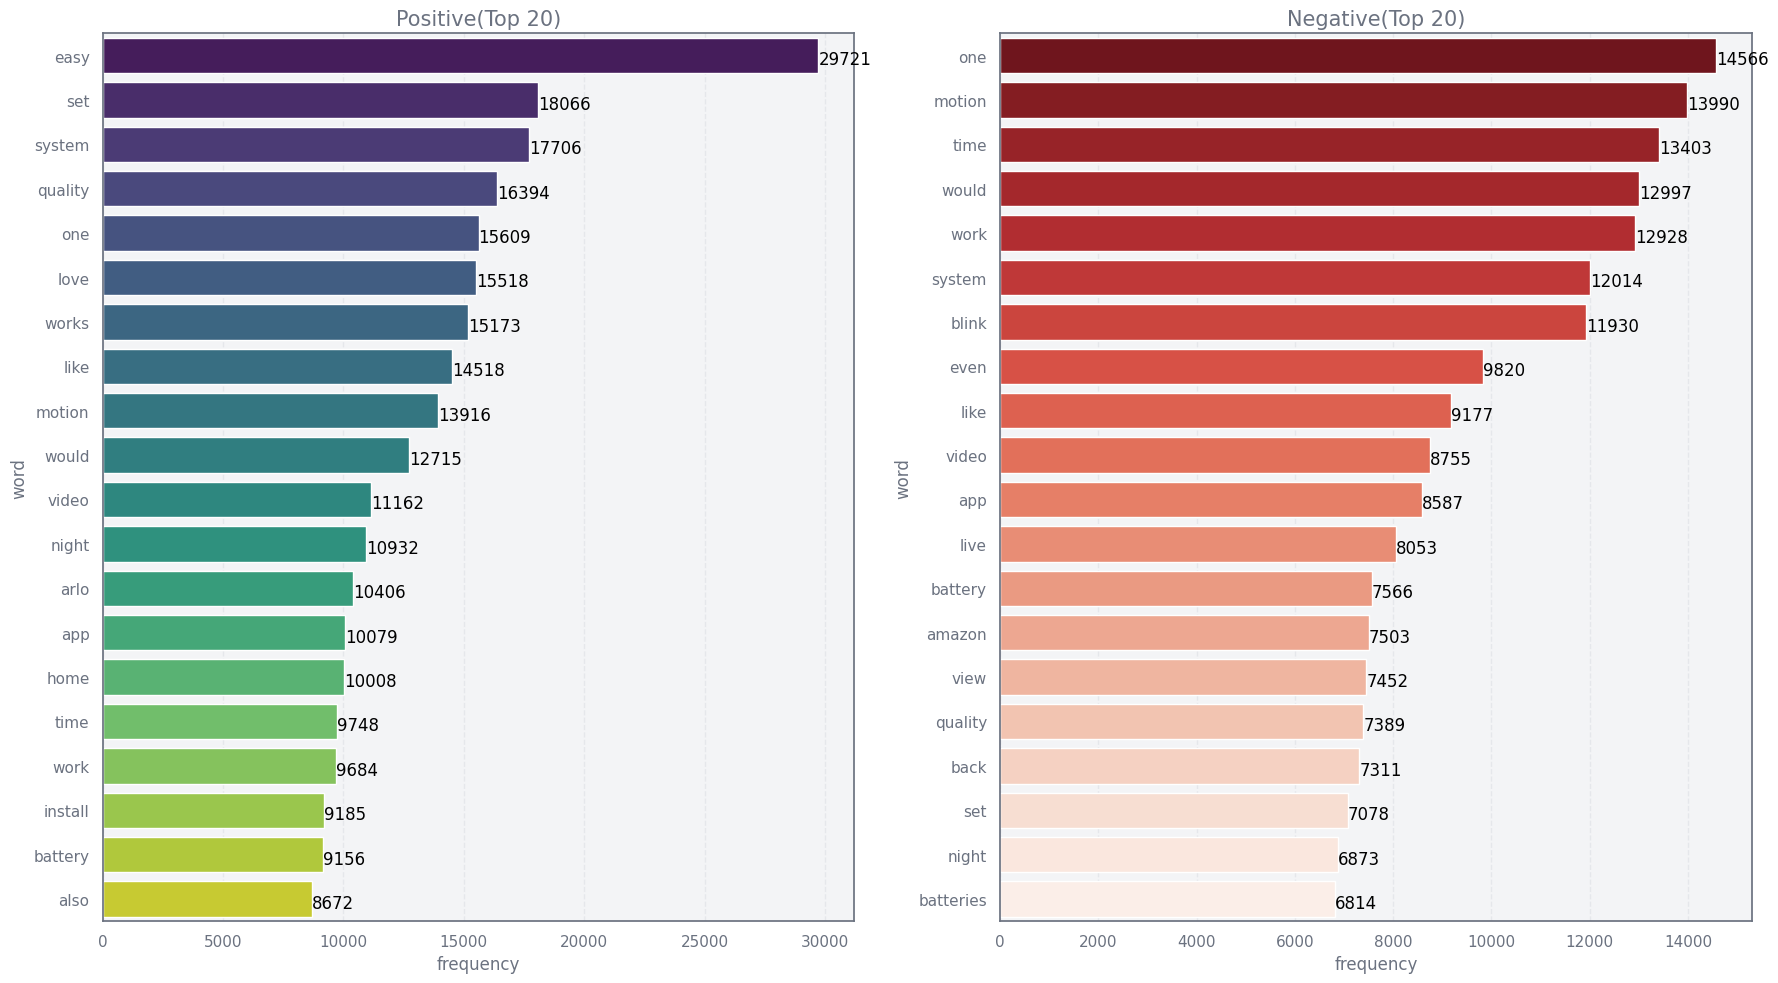


正面评论中最常出现的20个词:
       word  frequency
0      easy      29721
1       set      18066
2    system      17706
3   quality      16394
4       one      15609
5      love      15518
6     works      15173
7      like      14518
8    motion      13916
9     would      12715
10    video      11162
11    night      10932
12     arlo      10406
13      app      10079
14     home      10008
15     time       9748
16     work       9684
17  install       9185
18  battery       9156
19     also       8672

负面评论中最常出现的20个词:
         word  frequency
0         one      14566
1      motion      13990
2        time      13403
3       would      12997
4        work      12928
5      system      12014
6       blink      11930
7        even       9820
8        like       9177
9       video       8755
10        app       8587
11       live       8053
12    battery       7566
13     amazon       7503
14       view       7452
15    quality       7389
16       back       7311
17        set       7078
18      

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter



# 如果是第一次运行，需要下载停用词和分词器
nltk.download('punkt_tab')
nltk.download('stopwords')

# 文本预处理函数
def preprocess_text(text):
    # 转换为小写
    text = text.lower()
    # 移除特殊字符和数字
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # 分词
    tokens = word_tokenize(text)
    # 移除停用词
    stop_words = set(stopwords.words('english'))
    # 添加相机领域特定的停用词
    camera_stopwords = {'camera', 'cameras', 'photo', 'photos', 'picture', 'pictures', 'device', 'product', 'use', 'using', 'used', 'get', 'got', 'good', 'great', 'really', 'very', 'well'}
    stop_words.update(camera_stopwords)
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
    return tokens

# 提取所有正面和负面评论
positive_reviews = myDF[myDF['sentiment'] == 'positive']['text'].tolist()
negative_reviews = myDF[myDF['sentiment'] == 'negative']['text'].tolist()

# 预处理评论
positive_tokens = []
negative_tokens = []

for review in positive_reviews:
    positive_tokens.extend(preprocess_text(str(review)))

for review in negative_reviews:
    negative_tokens.extend(preprocess_text(str(review)))

# 计算词频
positive_freq = Counter(positive_tokens)
negative_freq = Counter(negative_tokens)

# 获取前20个最常见的词
top_positive = positive_freq.most_common(20)
top_negative = negative_freq.most_common(20)

# 创建DataFrame
positive_df = pd.DataFrame(top_positive, columns=['word', 'frequency'])
negative_df = pd.DataFrame(top_negative, columns=['word', 'frequency'])

# 创建画布
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))

# 正面评论词频柱状图
sns.barplot(x='frequency', y='word', data=positive_df, palette='viridis', ax=ax1)
ax1.set_title('Positive(Top 20)', fontsize=15)
ax1.set_xlabel('frequency', fontsize=12)
ax1.set_ylabel('word', fontsize=12)

# 为正面柱状图添加数据标签
for i, v in enumerate(positive_df['frequency']):
    ax1.text(v + 1, i + 0.2, str(v), color='black')

# 负面评论词频柱状图
sns.barplot(x='frequency', y='word', data=negative_df, palette='Reds_r', ax=ax2)
ax2.set_title('Negative(Top 20)', fontsize=15)
ax2.set_xlabel('frequency', fontsize=12)
ax2.set_ylabel('word', fontsize=12)

# 为负面柱状图添加数据标签
for i, v in enumerate(negative_df['frequency']):
    ax2.text(v + 1, i + 0.2, str(v), color='black')

plt.tight_layout()
plt.show()

# 打印结果
print("\n正面评论中最常出现的20个词:")
print(positive_df)

print("\n负面评论中最常出现的20个词:")
print(negative_df)

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
# download NLTK
nltk.download('punkt_tab')
nltk.download('stopwords')

# get stopword
stop_words = set(stopwords.words('english'))

# clean
def clean_and_tokenize(text):
    # 去除标点符号和数字
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # 分词
    words = word_tokenize(text.lower())
    # 去除停用词和单个字母的词
    words = [word for word in words if word not in stop_words and len(word) > 1]
    return words

# Apply the cleaning function
myDF['cleaned_text'] = myDF['text'].apply(clean_and_tokenize)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# 3.Data visualisation

## 3.1 Overall

### 3.1.1 variables

In [ ]:
myDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144346 entries, 0 to 144387
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             144346 non-null  float64
 1   title_x            144326 non-null  object 
 2   text               144346 non-null  object 
 3   images_x           144346 non-null  object 
 4   asin               144346 non-null  object 
 5   parent_asin        144346 non-null  object 
 6   user_id            144346 non-null  object 
 7   timestamp          144346 non-null  int64  
 8   helpful_vote       144346 non-null  int64  
 9   verified_purchase  144346 non-null  bool   
 10  main_category      144082 non-null  object 
 11  title_y            144346 non-null  object 
 12  average_rating     144346 non-null  float64
 13  rating_number      144346 non-null  int64  
 14  features           144346 non-null  object 
 15  description        144346 non-null  object 
 16  price  

In [ ]:
# Convert the ratings into emotional tags
myDF['sentiment'] = myDF['rating'].apply(lambda x: 'positive' if x >= 4 else 'negative')

In [ ]:
# the number of positive and negtive
sentiment_counts = myDF['sentiment'].value_counts()

# ratio
total_reviews = sentiment_counts.sum()
positive_ratio = sentiment_counts['positive'] / total_reviews
negative_ratio = sentiment_counts['negative'] / total_reviews

print(f"Total Reviews: {total_reviews}")
print(f"Positive Reviews: {sentiment_counts['positive']} ({positive_ratio:.2f})")
print(f"Negative Reviews: {sentiment_counts['negative']} ({negative_ratio:.2f})")

Total Reviews: 144346
Positive Reviews: 95310 (0.66)
Negative Reviews: 49036 (0.34)


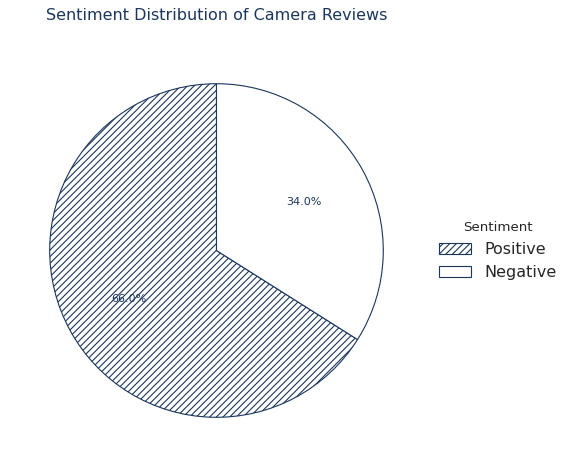

In [ ]:
import matplotlib.pyplot as plt

sentiment_counts = pd.Series([95351, 49037], index=['Positive', 'Negative'])

# style
patterns = ['////', None]
colors = ['white'] * len(sentiment_counts)
edgecolor = '#1A365D'

# 创建饼图
fig, ax = plt.subplots(figsize=(8, 6))
wedges, _, autotexts = ax.pie(
    sentiment_counts,
    labels=None,  # 隐藏原始标签（用图例代替）
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={
        'edgecolor': edgecolor,
        'linewidth': 1,
        'linestyle': '-'
    }
)

# 为每个扇区添加斜条纹
for wedge, pattern in zip(wedges, patterns):
    wedge.set_hatch(pattern)

# figure lengel
ax.legend(
    wedges,
    sentiment_counts.index,
    title="Sentiment",
    loc="center left",
    bbox_to_anchor=(1, 0.5),  # right
    frameon=False
)

#
plt.setp(autotexts, size=10, color=edgecolor)
ax.set_title(
    'Sentiment Distribution of Camera Reviews',
    pad=20,
    color=edgecolor )


plt.tight_layout()
plt.show()

<ipython-input-2-a69f36ecf367>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=myDF, palette=[colors['主色'], colors['次要色'], colors['中性色'], colors['次要色'], colors['主色']])


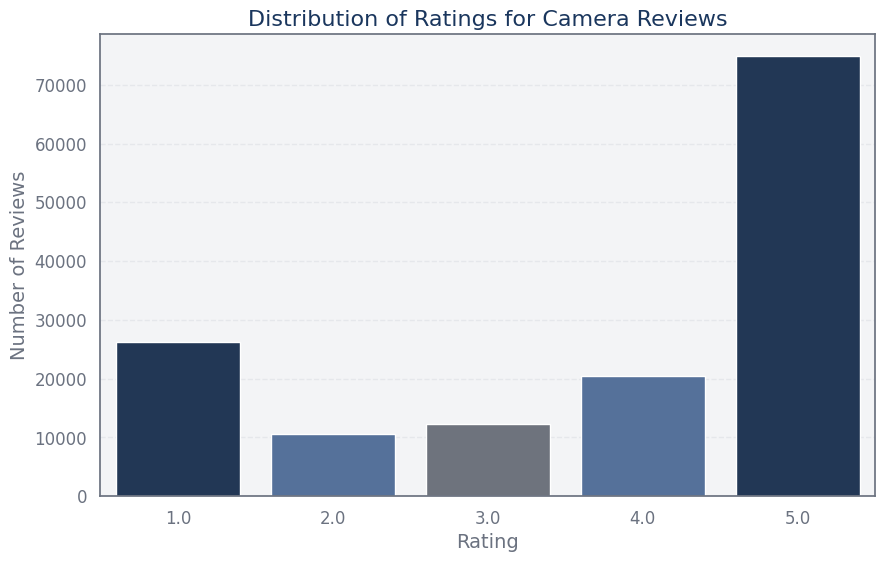

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 定义颜色方案
colors = {
    '主色': '#1A365D',  # 深蓝 - 专业、信任
    '次要色': '#4A6FA5',  # 中蓝 - 用于强调
    '中性色': '#6B7280',  # 深灰 - 用于文本和边框
    '背景色': '#F3F4F6',  # 浅灰 - 用于背景
    '线条色': '#E5E7EB'   # 更浅的灰色 - 用于网格线
}

# 设置图表样式
sns.set(style="whitegrid", rc={
    "axes.facecolor": colors['背景色'],
    "grid.color": colors['线条色'],
    "grid.linestyle": "--",
    "axes.edgecolor": colors['中性色'],
    "text.color": colors['中性色'],
    "axes.labelcolor": colors['中性色'],
    "xtick.color": colors['中性色'],
    "ytick.color": colors['中性色']
})

# 绘制各评分段数量的柱状图
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=myDF, palette=[colors['主色'], colors['次要色'], colors['中性色'], colors['次要色'], colors['主色']])

# 添加标题和标签
plt.title('Distribution of Ratings for Camera Reviews', fontsize=16, color=colors['主色'])
plt.xlabel('Rating', fontsize=14, color=colors['中性色'])
plt.ylabel('Number of Reviews', fontsize=14, color=colors['中性色'])

# 设置刻度标签颜色
plt.xticks(fontsize=12, color=colors['中性色'])
plt.yticks(fontsize=12, color=colors['中性色'])

# 显示图表
plt.show()

In [ ]:
# 计算众数
mode_rating = myDF['rating'].mode()[0]

# 计算中位数
median_rating = myDF['rating'].median()

# 计算平均数
mean_rating = myDF['rating'].mean()

print(f"Mode of Ratings: {mode_rating}")
print(f"Median of Ratings: {median_rating}")
print(f"Mean of Ratings: {mean_rating:.2f}")

Mode of Ratings: 5.0
Median of Ratings: 5.0
Mean of Ratings: 3.74


## 3.2 visualization

<ipython-input-11-9ba778817583>:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=brand_ratings[brand_ratings['brand'].isin(top_brands)],


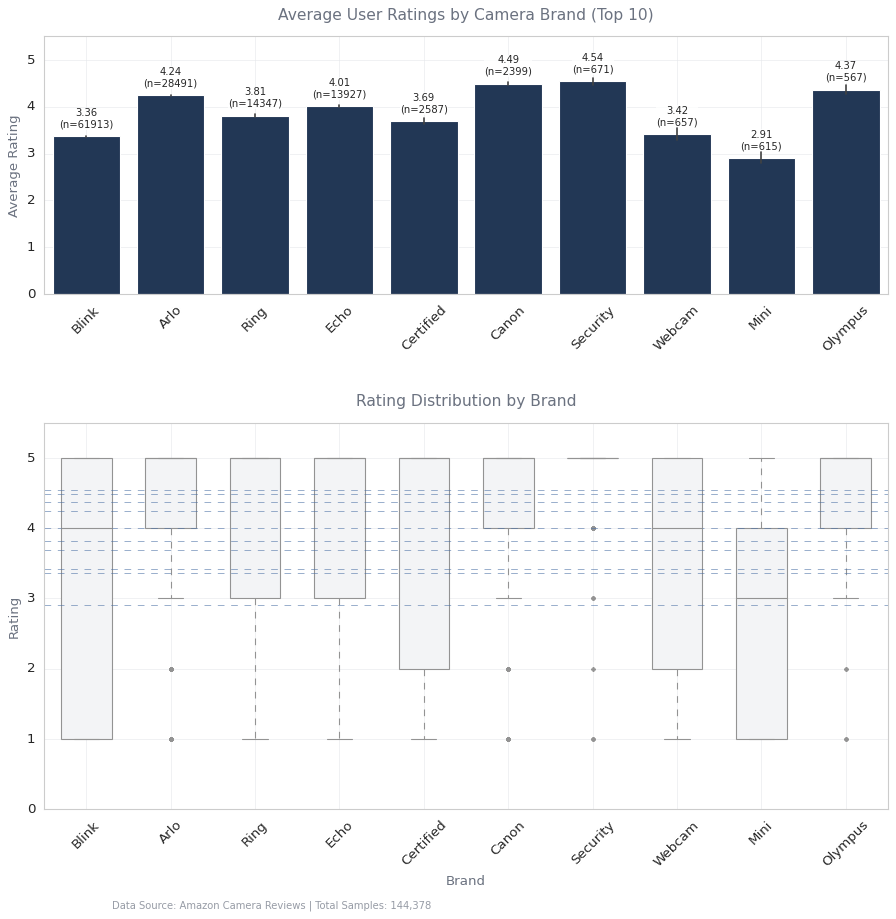


品牌间评分差异统计检验（ANOVA）：
F-statistic: 920.05, p-value: 0.0000
→ 不同品牌间的评分存在显著差异


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# 设置专业蓝灰色调样式
plt.style.use('classic')  # 使用简洁的样式
sns.set_style("whitegrid")  # 白色背景+网格线

# 自定义颜色方案 - 专业蓝灰色调
camera_palette = {
    '主色': '#1A365D',  # 深蓝 - 专业、信任
    '次要色': '#4A6FA5',  # 中蓝 - 用于强调
    '中性色': '#6B7280',  # 深灰 - 用于文本和边框
    '背景色': '#F3F4F6',  # 浅灰 - 用于背景
    '线条色': '#E5E7EB',  # 更浅的灰色 - 用于网格线
}

# 1. 数据准备
myDF['brand'] = myDF['title_y'].str.extract(r'([A-Za-z]+)')[0]
brand_ratings = myDF[['brand', 'rating']].dropna()
top_brands = brand_ratings['brand'].value_counts().nlargest(10).index

# 2. 创建画布
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={'height_ratios': [2, 3]})

# ========== 上部：柱状图 ==========
sns.barplot(data=brand_ratings[brand_ratings['brand'].isin(top_brands)],
            x='brand',
            y='rating',
            order=top_brands,
            ci=95,
            ax=ax1,
            color=camera_palette['主色'])  # 使用深蓝色柱子

# 柱状图标注
brand_stats = brand_ratings.groupby('brand')['rating'].agg(['mean', 'count', 'std'])
for i, brand in enumerate(top_brands):
    mean = brand_stats.loc[brand, 'mean']
    count = brand_stats.loc[brand, 'count']
    ax1.text(i, mean+0.15, f'{mean:.2f}\n(n={count})',
             ha='center', va='bottom', fontsize=9,
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=0.3))

ax1.set_title('Average User Ratings by Camera Brand (Top 10)', fontsize=14, pad=15, color=camera_palette['中性色'])
ax1.set_xlabel('')
ax1.set_ylabel('Average Rating', fontsize=12, color=camera_palette['中性色'])
ax1.set_ylim(0, 5.5)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(color=camera_palette['线条色'], linestyle='-', linewidth=0.5)  # 设置网格线颜色

# ========== 下部：箱线图 ==========
sns.boxplot(data=brand_ratings[brand_ratings['brand'].isin(top_brands)],
            x='brand',
            y='rating',
            order=top_brands,
            ax=ax2,
            width=0.6,
            linewidth=1,
            fliersize=3,
            color=camera_palette['背景色'])  # 使用浅灰色箱体

# 箱线图美化
ax2.set_title('Rating Distribution by Brand', fontsize=14, pad=15, color=camera_palette['中性色'])
ax2.set_xlabel('Brand', fontsize=12, color=camera_palette['中性色'])
ax2.set_ylabel('Rating', fontsize=12, color=camera_palette['中性色'])
ax2.set_ylim(0, 5.5)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(color=camera_palette['线条色'], linestyle='-', linewidth=0.5)  # 设置网格线颜色

# 添加横向均值参考线 - 使用次要蓝色
for brand in top_brands:
    mean_val = brand_stats.loc[brand, 'mean']
    ax2.axhline(mean_val, ls='--', lw=0.7, color=camera_palette['次要色'], alpha=0.7)

# ========== 统计标注 ==========
fig.text(0.15, 0.02,
         f"Data Source: Amazon Camera Reviews | Total Samples: {len(brand_ratings):,}",
         fontsize=9, alpha=0.7, color=camera_palette['中性色'])

plt.tight_layout(pad=3.0)
plt.show()

# ========== 统计检验 ==========
print("\n品牌间评分差异统计检验（ANOVA）：")
groups = [brand_ratings[brand_ratings['brand']==b]['rating'] for b in top_brands]
f_val, p_val = stats.f_oneway(*groups)
print(f"F-statistic: {f_val:.2f}, p-value: {p_val:.4f}")
if p_val < 0.05:
    print("→ 不同品牌间的评分存在显著差异")
else:
    print("→ 品牌间评分差异不显著")

## 出现频率最多的词

In [ ]:
from collections import Counter

# 展平所有分词列表
all_tokens = [token for sublist in myDF['cleaned_text'] for token in sublist]

# 统计词频
word_freq = Counter(all_tokens)

# 获取出现次数最多的前 20 个词
most_common_words = word_freq.most_common(20)

<ipython-input-9-bae09428744b>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words], palette=[colors['主色']]*20)


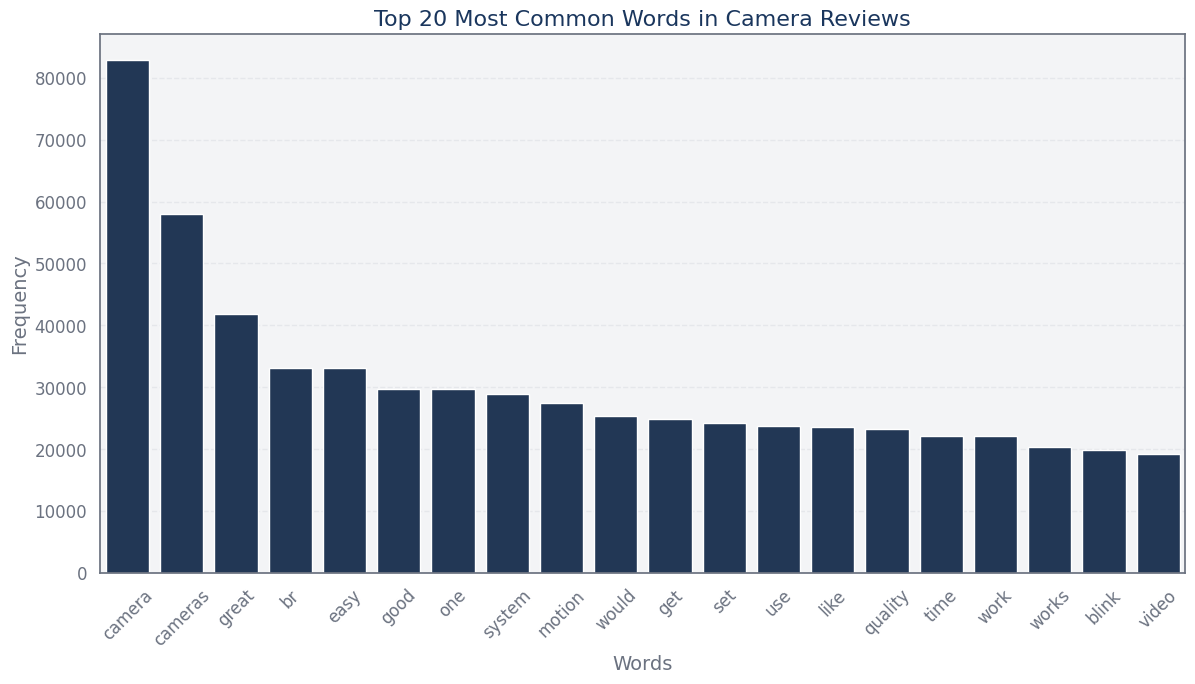

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 定义颜色方案
colors = {
    '主色': '#1A365D',  # 深蓝 - 专业、信任
    '次要色': '#4A6FA5',  # 中蓝 - 用于强调
    '中性色': '#6B7280',  # 深灰 - 用于文本和边框
    '背景色': '#F3F4F6',  # 浅灰 - 用于背景
    '线条色': '#E5E7EB'   # 更浅的灰色 - 用于网格线
}

# 设置图表样式
sns.set(style="whitegrid", rc={
    "axes.facecolor": colors['背景色'],
    "grid.color": colors['线条色'],
    "grid.linestyle": "--",
    "axes.edgecolor": colors['中性色'],
    "text.color": colors['中性色'],
    "axes.labelcolor": colors['中性色'],
    "xtick.color": colors['中性色'],
    "ytick.color": colors['中性色']
})

# 绘制柱状图
plt.figure(figsize=(14, 7))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words], palette=[colors['主色']]*20)

# 添加标题和标签
plt.title('Top 20 Most Common Words in Camera Reviews', fontsize=16, color=colors['主色'])
plt.xlabel('Words', fontsize=14, color=colors['中性色'])
plt.ylabel('Frequency', fontsize=14, color=colors['中性色'])

# 设置刻度标签颜色
plt.xticks(fontsize=12, color=colors['中性色'], rotation=45)
plt.yticks(fontsize=12, color=colors['中性色'])

# 显示图表
plt.show()

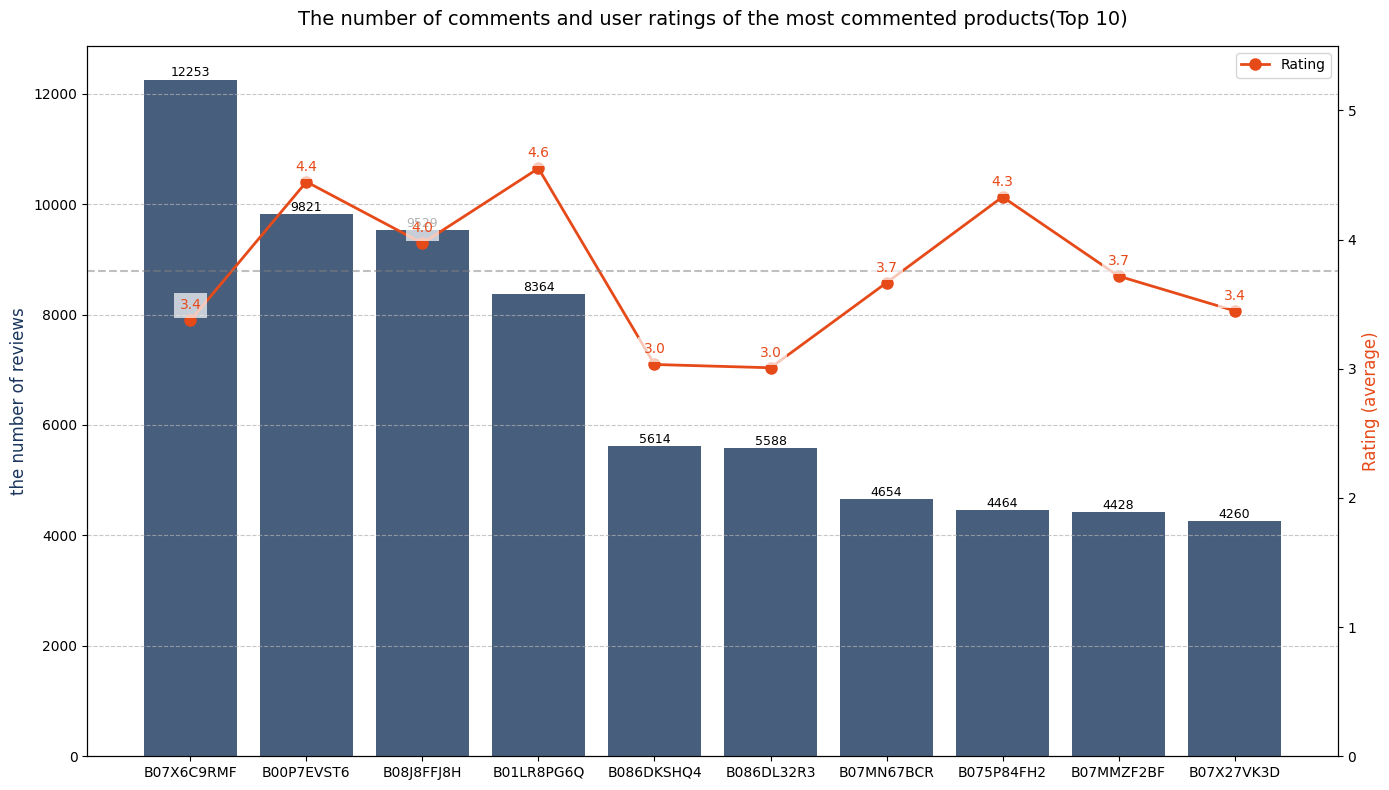


前10名最多被评论产品的详细信息：
         asin  total_reviews    rating  positive_ratio
3  B01LR8PG6Q           8364  4.551530        0.940937
1  B00P7EVST6           9821  4.447510        0.909480
7  B075P84FH2           4464  4.330421        0.856183
2  B08J8FFJ8H           9529  3.971351        0.707944
8  B07MMZF2BF           4428  3.717254        0.649503
6  B07MN67BCR           4654  3.666094        0.635153
9  B07X27VK3D           4260  3.448826        0.563850
0  B07X6C9RMF          12253  3.374194        0.539623
4  B086DKSHQ4           5614  3.033131        0.450125
5  B086DL32R3           5588  3.007695        0.434681


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




# 计算每个产品的评论数量
product_review_counts = myDF.groupby('asin')['parent_asin'].count().reset_index()
product_review_counts.columns = ['asin', 'total_reviews']

# 获取评论数量最多的前10个产品
top_10_products = product_review_counts.sort_values('total_reviews', ascending=False).head(10)

# 合并评论数量和评分数据
top_10_data = pd.merge(top_10_products, myDF.groupby('asin')['rating'].mean().reset_index(), on='asin')

# 计算每个产品的情绪分布
product_sentiment = myDF.groupby(['asin', 'sentiment'])['parent_asin'].count().unstack(fill_value=0)
product_sentiment = product_sentiment.reset_index()

# 合并所有数据
top_10_sentiment = pd.merge(top_10_data, product_sentiment, on='asin')

# 计算每个产品的积极情绪比例
top_10_sentiment['positive_ratio'] = top_10_sentiment['positive'] / (top_10_sentiment['positive'] + top_10_sentiment['negative'])

# 按评论数量排序（从高到低）
sorted_data = top_10_sentiment.sort_values('total_reviews', ascending=False)
x_labels = sorted_data['asin']

# 创建画布
plt.figure(figsize=(14, 8))

# 绘制评论数量柱状图
ax1 = plt.subplot(111)
color1 = '#1A365D'  # 深蓝色
bars = ax1.bar(x_labels, sorted_data['total_reviews'], color=color1, alpha=0.8)
ax1.set_ylabel('the number of reviews', fontsize=12, color=color1)
ax1.set_title('The number of comments and user ratings of the most commented products(Top 10)', fontsize=14, pad=15)

# 为评论数量添加数据标签
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 3,
             f'{height}', ha='center', va='bottom', fontsize=9)

# 绘制评分折线图
ax2 = ax1.twinx()
color2 = '#E64A19'  # 橙色 - 与蓝色形成对比
line = ax2.plot(x_labels, sorted_data['rating'],
                marker='o', markersize=8, color=color2,
                linewidth=2, label='Rating')
ax2.set_ylabel('Rating (average)', fontsize=12, color=color2)
ax2.set_ylim(0, 5.5)  # 假设评分范围是0-5

# 为评分添加数据标签
for x, y in zip(x_labels, sorted_data['rating']):
    ax2.annotate(f'{y:.1f}', (x, y), textcoords='offset points',
                xytext=(0,8), ha='center', color=color2,
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# 添加图例
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# 设置x轴标签旋转45度
plt.xticks(rotation=45, ha='right')

# 添加网格线
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# 添加平均评分参考线
avg_rating = sorted_data['rating'].mean()
ax2.axhline(y=avg_rating, color='gray', linestyle='--', alpha=0.5, label=f'Average rating: {avg_rating:.2f}')

# 显示图形
plt.tight_layout()
plt.show()

# 打印前10名产品的详细信息
print("\n前10名最多被评论产品的详细信息：")
print(sorted_data[['asin', 'total_reviews', 'rating', 'positive_ratio']].sort_values('rating', ascending=False))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 计算每个产品的评论数量
product_review_counts = myDF.groupby('asin')['parent_asin'].count().reset_index()
product_review_counts.columns = ['asin', 'total_reviews']

# 获取评论数量最多的前10个产品
top_10_products = product_review_counts.sort_values('total_reviews', ascending=False).head(10)

# 合并评论数量和评分数据
top_10_data = pd.merge(top_10_products, myDF.groupby('asin')['rating'].mean().reset_index(), on='asin')

# 计算每个产品的情绪分布
product_sentiment = myDF.groupby(['asin', 'sentiment'])['parent_asin'].count().unstack(fill_value=0)
product_sentiment = product_sentiment.reset_index()

# 合并所有数据，包括title_x, title_y和price
top_10_sentiment = pd.merge(top_10_data, product_sentiment, on='asin')
top_10_sentiment = pd.merge(top_10_sentiment, myDF[['asin',  'title_y', 'price']], on='asin', how='left')

# 计算每个产品的积极情绪比例
top_10_sentiment['positive_ratio'] = top_10_sentiment['positive'] / (top_10_sentiment['positive'] + top_10_sentiment['negative'])

# 按评论数量排序（从高到低）
sorted_data = top_10_sentiment.sort_values('total_reviews', ascending=False)
x_labels = sorted_data['asin']



# 打印前10名产品的详细信息，按照asin去重
print("\n前10名最多被评论产品的详细信息：")
unique_sorted_data = sorted_data.drop_duplicates(subset='asin')
# 设置显示选项，确保内容完整显示
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
# 以表格形式展示数据
styled_data = unique_sorted_data[['asin',  'title_y', 'price', 'total_reviews', 'rating', 'positive_ratio']].sort_values('rating', ascending=False).style
print(styled_data.to_string())


前10名最多被评论产品的详细信息：
 asin title_y price total_reviews rating positive_ratio
39962 B01LR8PG6Q Arlo Pro - Wireless Home Security Camera System with Siren | Rechargeable, Night vision, Indoor/Outdoor, HD Video, 2-Way Audio, Wall Mount | Cloud Storage Included | 1 camera kit (VMS4130) nan 8364 4.551530 0.940937
22073 B00P7EVST6 Arlo - Wireless Home Security Camera System | Indoor/Outdoor | 2 camera kit (Discontinued) nan 9821 4.447510 0.909480
60221 B075P84FH2 Arlo VMS4120P-100NAS Pro 2 - Wire-Free Home Security Camera | Rechargeable Battery, Night Vision, 2-Way Audio, Wall Mount | 1 camera kit nan 4464 4.330421 0.856183
22089 B08J8FFJ8H Echo Show 5 (2nd Gen, 2021 release) | Smart display with Alexa and 2 MP camera | Charcoal nan 9529 3.971351 0.707944
64714 B07MMZF2BF Blink XT2 Outdoor/Indoor Smart Security Camera with cloud storage included, 2-way audio, 2-year battery life – 1 camera kit 99.990000 4428 3.717254 0.649503
55790 B07MN67BCR Blink XT2 Outdoor/Indoor Smart Security Camera with

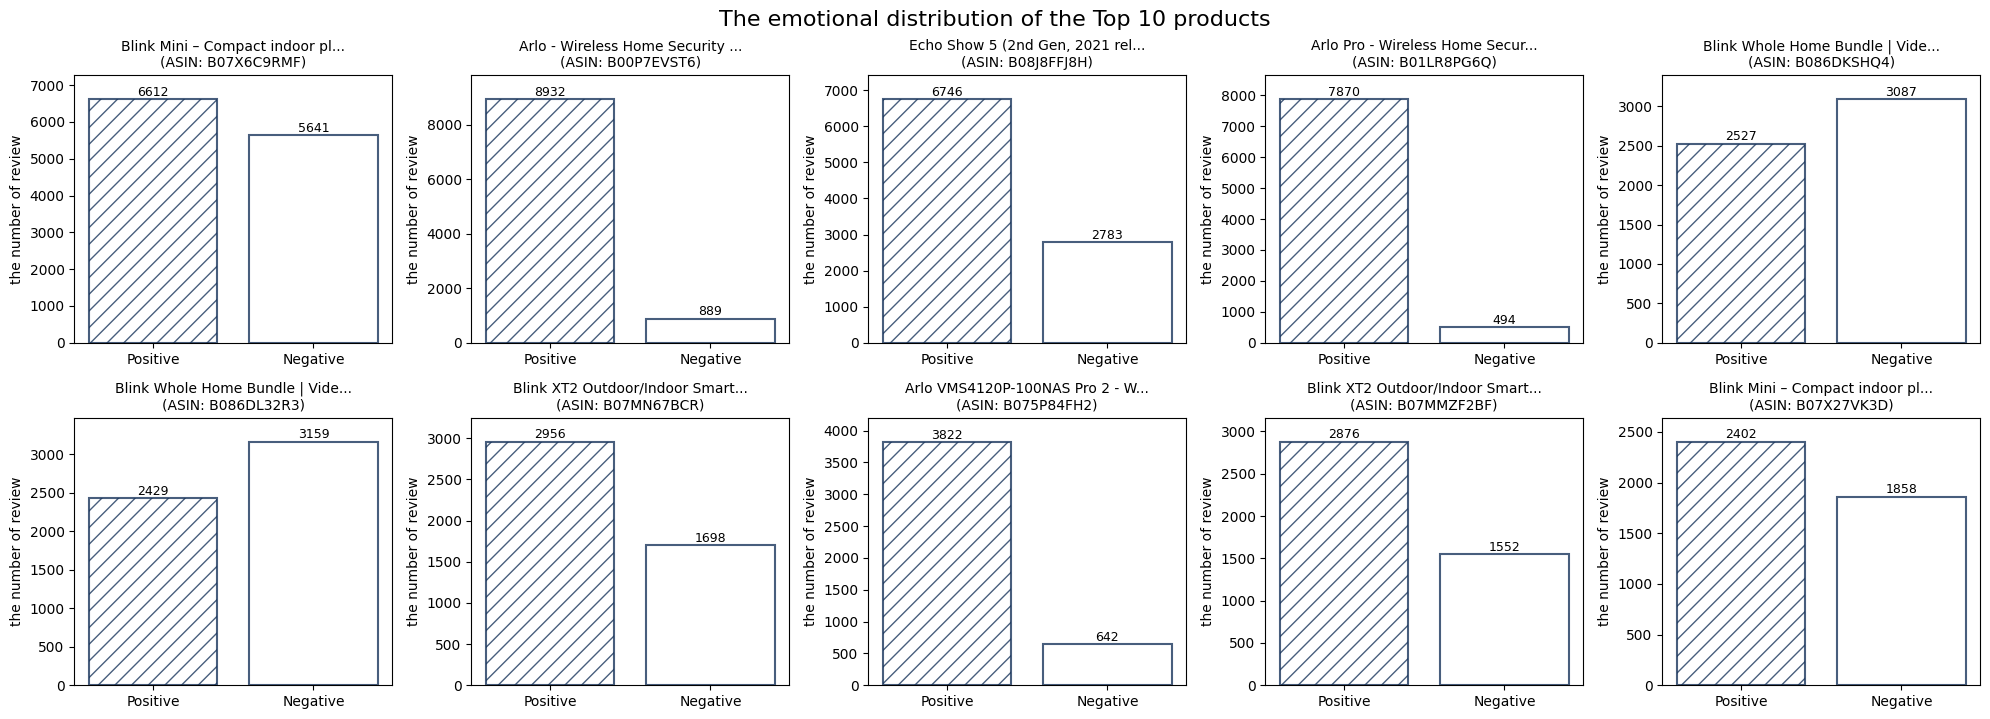

In [ ]:
# 可视化每个产品的情绪分布（修改后）


    # 重置索引并限制为前10行
unique_sorted_data = unique_sorted_data.reset_index(drop=True).head(10)

plt.figure(figsize=(20, 7))
for i, (index, row) in enumerate(unique_sorted_data.iterrows()):
    plt.subplot(2, 5, i+1)
    # 其余代码保持不变
    sentiment_counts = [row['positive'], row['negative']]
    sentiment_labels = ['Positive', 'Negative']

    # 绘制Positive条柱（斜条纹填充）
    pos_bar = plt.bar(sentiment_labels[0], sentiment_counts[0], color='white', edgecolor='#1A365D', linewidth=1.5, alpha=0.8)
    for patch in pos_bar:
        patch.set_hatch('//')  # 设置斜条纹

    # 绘制Negative条柱（白色填充）
    neg_bar = plt.bar(sentiment_labels[1], sentiment_counts[1], color='white', edgecolor='#1A365D', linewidth=1.5, alpha=0.8)

    plt.title(f"{row['title_y'][:30]}...\n(ASIN: {row['asin']})", fontsize=10)
    plt.ylabel('the number of review')
    plt.ylim(0, max(sentiment_counts) * 1.1)  # 稍微增加y轴上限，使标签有空间

    # 添加数据标签
    bars = pos_bar + neg_bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 5,
                 f'{int(height)}', ha='center', va='bottom', fontsize=9)


plt.tight_layout()
plt.suptitle('The emotional distribution of the Top 10 products', fontsize=16, y=1.02)
plt.show()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


用户负面评价中最常提到的问题:


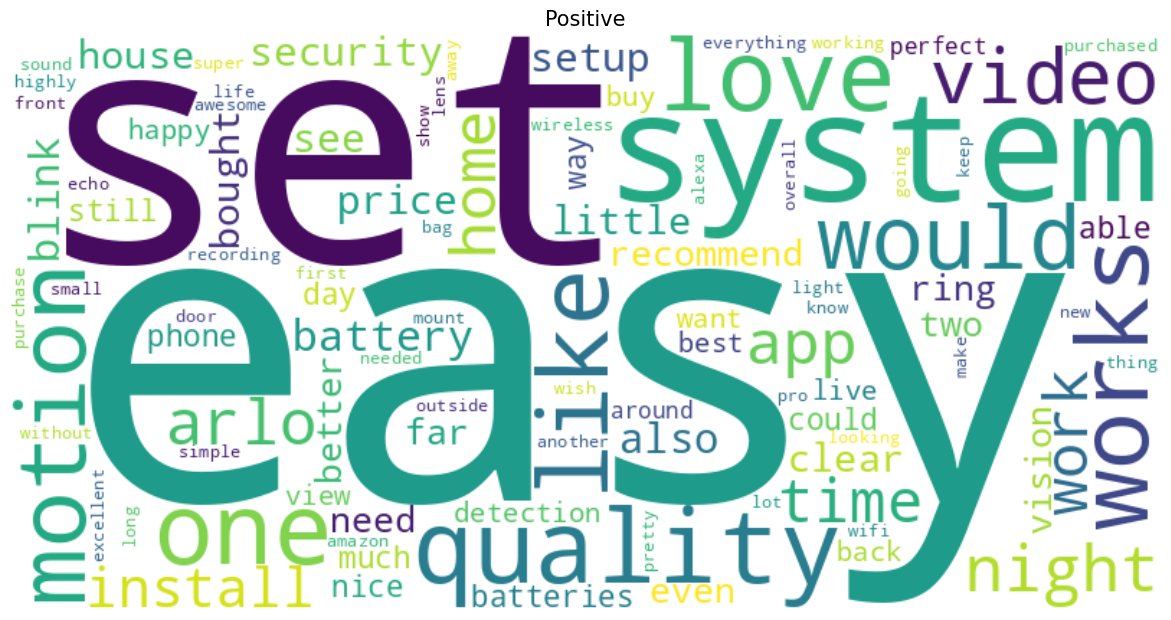


用户负面评价中最常提到的问题:


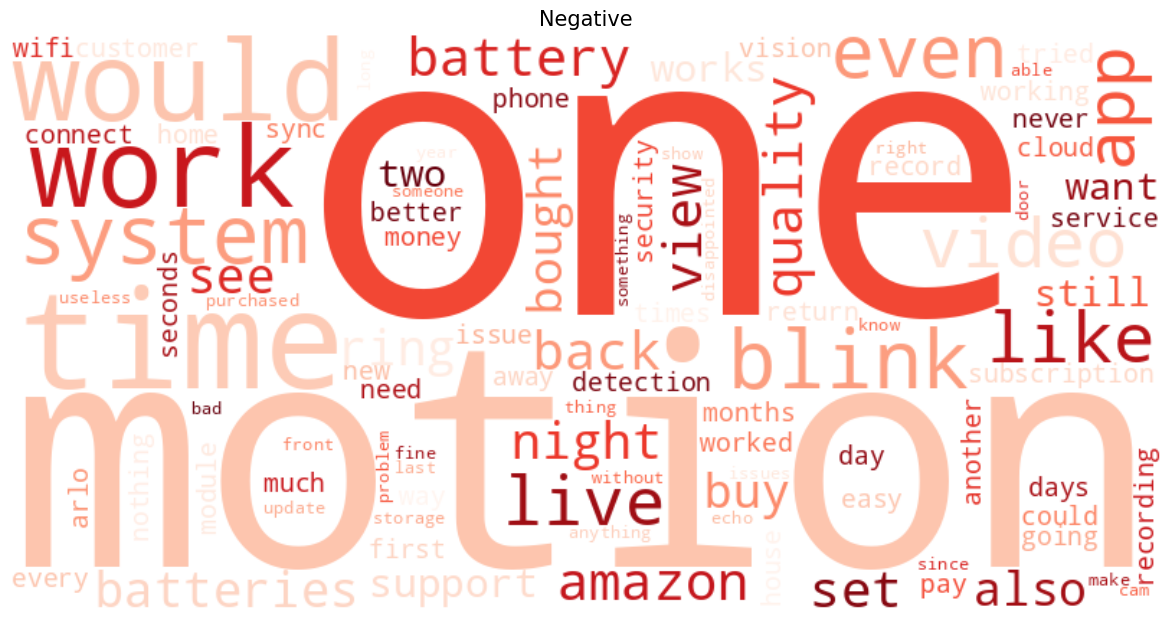


用户评论中最常出现的功能组合 (Positive):


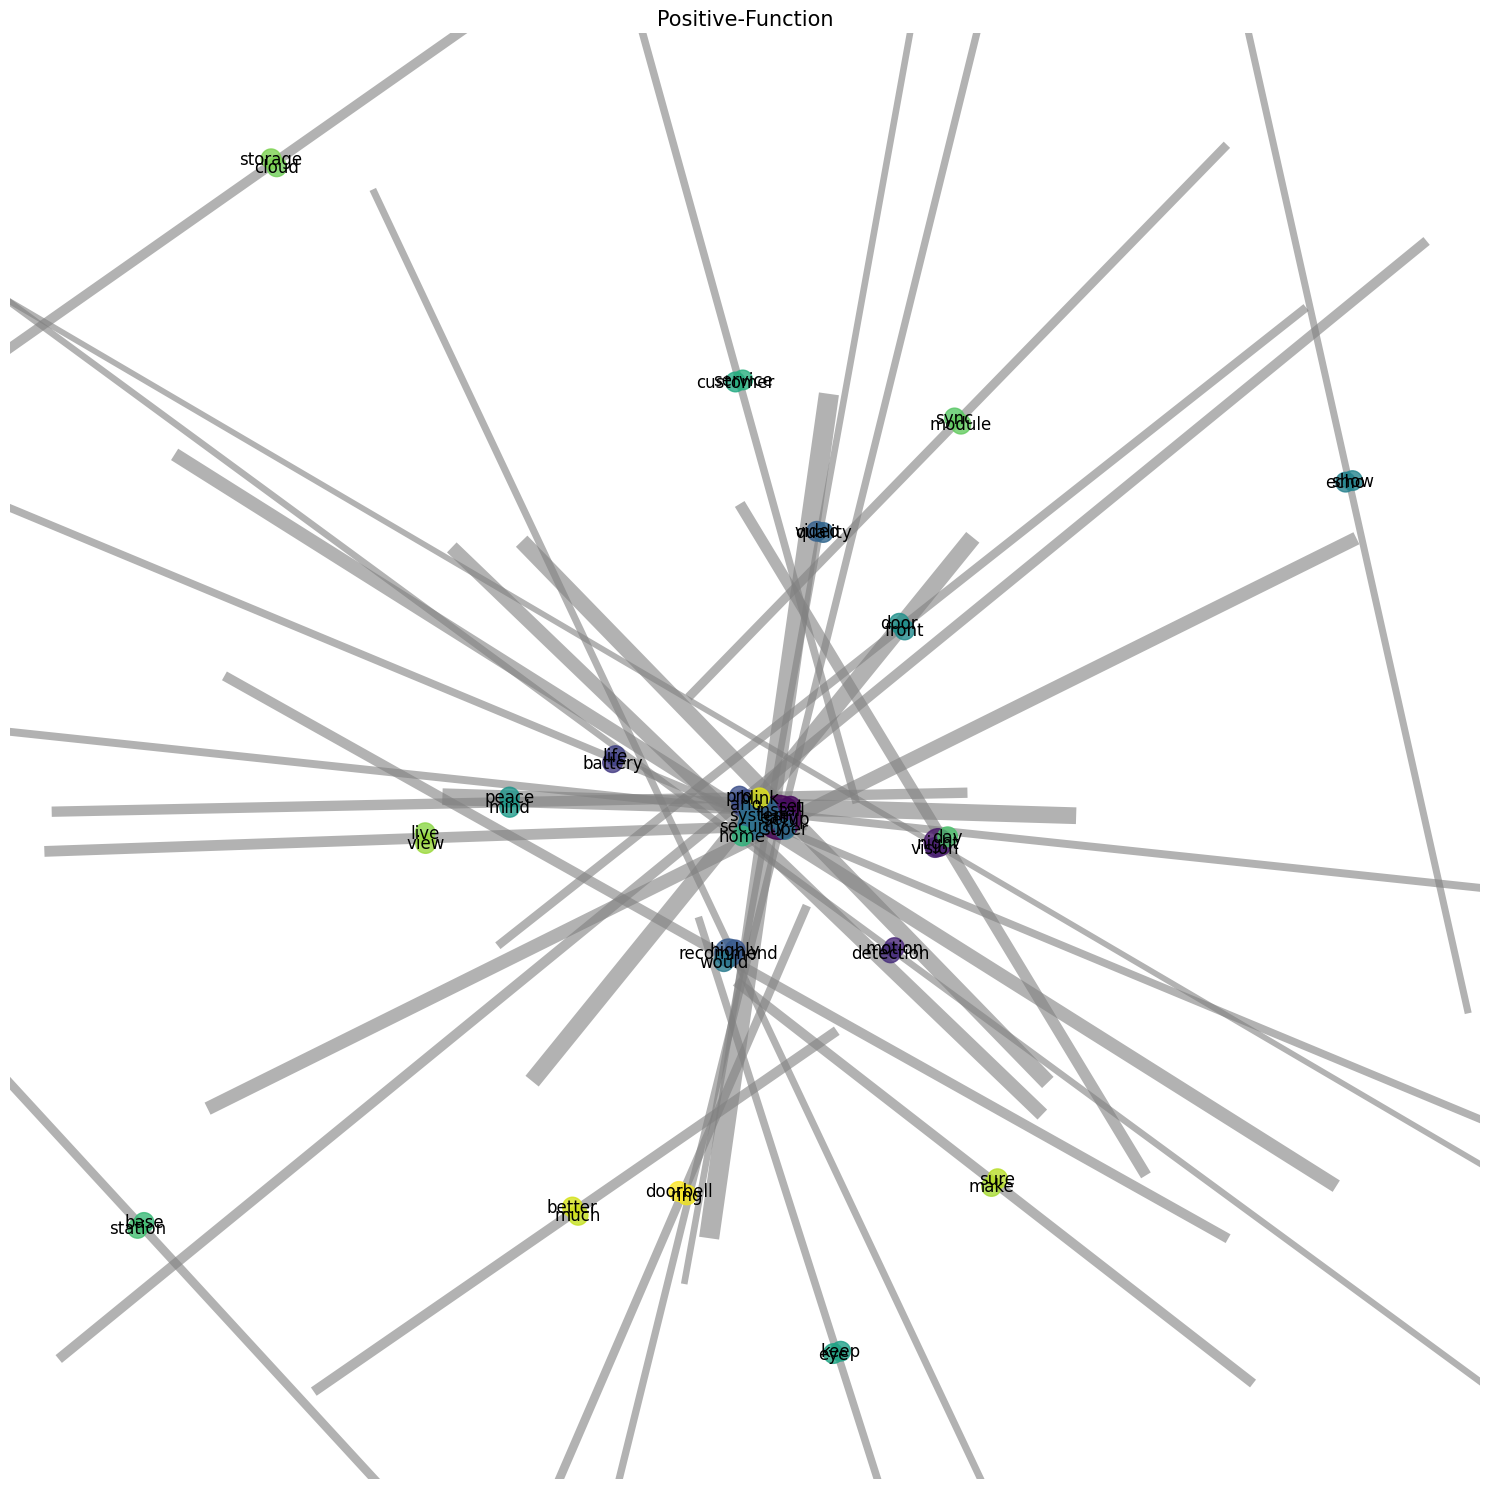


用户评论中最常出现的问题组合 (Negative):


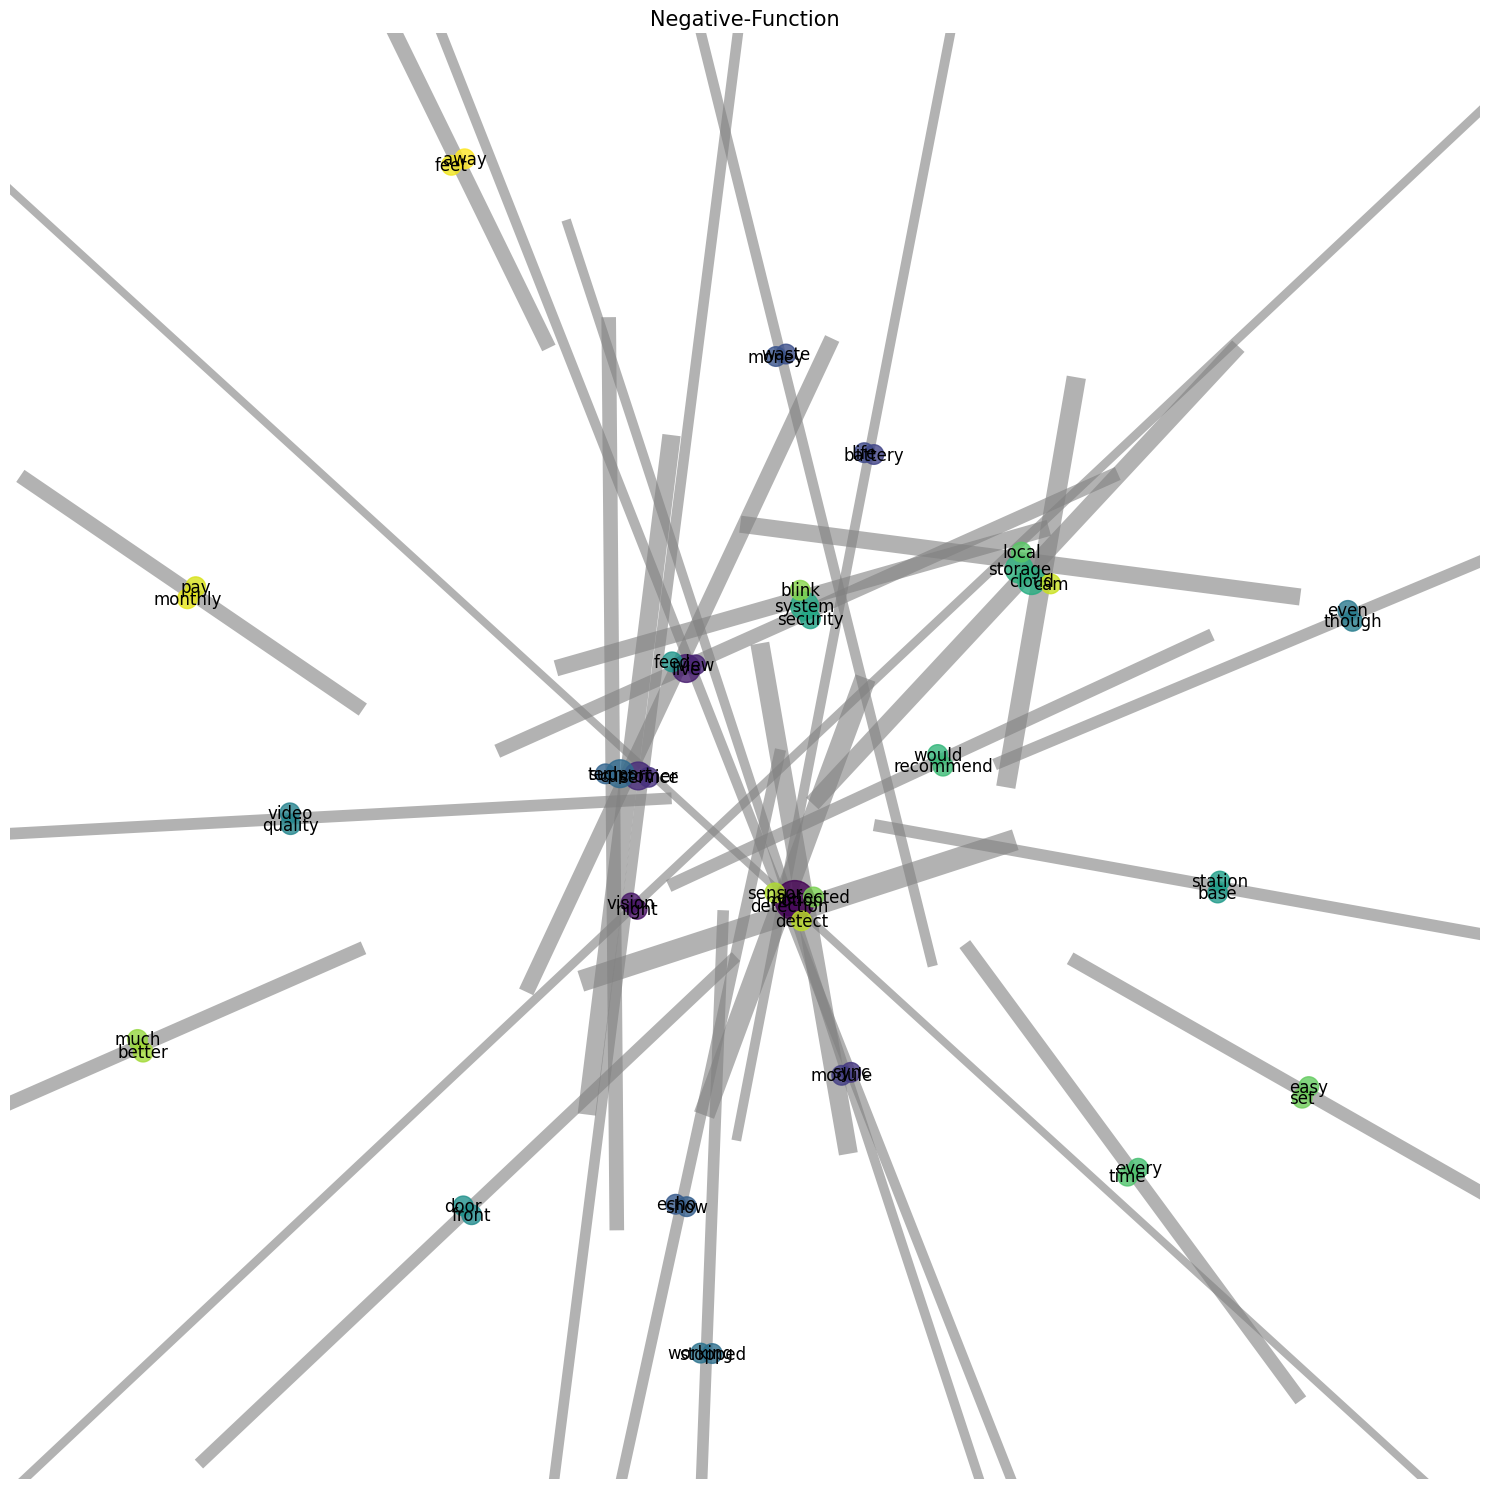


用户最关心的相机功能 (基于正面评价):
- easy: 29721times
- set: 18066times
- system: 17706times
- quality: 16394times
- one: 15609times
- love: 15518times
- works: 15173times
- like: 14518times
- motion: 13916times
- would: 12715times

用户抱怨最多的相机问题 (基于负面评价):
- one: 14566times
- motion: 13990times
- time: 13403times
- would: 12997times
- work: 12928times
- system: 12014times
- blink: 11930times
- even: 9820times
- like: 9177times
- video: 8755times

用户提到的最常见功能组合 (基于正面评价):
- easy set: 7221times
- easy install: 6037times
- night vision: 5819times
- motion detection: 4520times
- easy setup: 3346times
- battery life: 3268times
- arlo pro: 2544times
- highly recommend: 2426times
- video quality: 2201times
- security system: 1977times


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import networkx as nx
from nltk.util import bigrams
from collections import Counter
from PIL import Image
import matplotlib.colors as mcolors


# 如果是第一次运行，需要下载停用词和分词器
nltk.download('punkt_tab')
nltk.download('stopwords')

# 1. 文本预处理函数
def preprocess_text(text):
    # 转换为小写
    text = text.lower()
    # 移除特殊字符和数字
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # 分词
    tokens = word_tokenize(text)
    # 移除停用词
    stop_words = set(stopwords.words('english'))
    # 添加相机领域特定的停用词
    camera_stopwords = {'camera', 'cameras', 'photo', 'photos', 'picture', 'pictures', 'device', 'product', 'use', 'using', 'used', 'get', 'got', 'good', 'great', 'really', 'very', 'well'}
    stop_words.update(camera_stopwords)
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
    return tokens

# 2. 提取所有正面和负面评论
positive_reviews = myDF[myDF['sentiment'] == 'positive']['text'].tolist()
negative_reviews = myDF[myDF['sentiment'] == 'negative']['text'].tolist()

# 3. 预处理评论
positive_tokens = []
negative_tokens = []

for review in positive_reviews:
    positive_tokens.extend(preprocess_text(str(review)))

for review in negative_reviews:
    negative_tokens.extend(preprocess_text(str(review)))

# 4. 生成词云
def generate_wordcloud(tokens, title, color_map='viridis'):
    # 计算词频
    word_freq = Counter(tokens)

    # 创建词云
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=100,
        colormap=color_map,
        random_state=42
    ).generate_from_frequencies(word_freq)

    # 显示词云
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=15)
    plt.tight_layout(pad=0)
    plt.show()

    # 返回前20个最常见的词
    return word_freq.most_common(20)

print("用户负面评价中最常提到的问题:")
positive_top_words = generate_wordcloud(positive_tokens, 'Positive', 'viridis')

print("\n用户负面评价中最常提到的问题:")
negative_top_words = generate_wordcloud(negative_tokens, 'Negative', 'Reds')

# 5. 生成二元语法网络
def generate_bigram_network(tokens, title, top_n=30):
    # 生成bigrams
    bigram_list = list(bigrams(tokens))

    # 计算bigram频率
    bigram_freq = Counter(bigram_list)

    # 获取前N个最常见的bigrams
    top_bigrams = bigram_freq.most_common(top_n)

    # 创建网络图
    G = nx.Graph()

    # 添加节点和边
    for bigram, freq in top_bigrams:
        word1, word2 = bigram
        G.add_edge(word1, word2, weight=freq)

    # 设置节点大小和边的粗细
    node_size = [G.degree(node) * 200 for node in G.nodes()]
    edge_width = [d['weight'] * 0.5 for (u, v, d) in G.edges(data=True)]

    # 设置节点颜色
    node_colors = list(range(len(G.nodes())))

    # 绘制网络图
    plt.figure(figsize=(15, 15))
    pos = nx.spring_layout(G, k=0.3, iterations=50)

    nx.draw_networkx_nodes(G, pos, node_size=node_size, alpha=0.8,
                          node_color=node_colors, cmap=plt.cm.viridis)
    nx.draw_networkx_edges(G, pos, width=edge_width, alpha=0.6,
                          edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=12)

    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    return top_bigrams

print("\n用户评论中最常出现的功能组合 (Positive):")
positive_bigrams = generate_bigram_network(positive_tokens, 'Positive-Function')

print("\n用户评论中最常出现的问题组合 (Negative):")
negative_bigrams = generate_bigram_network(negative_tokens, 'Negative-Function')

# 6. 打印结果摘要
print("\n用户最关心的相机功能 (基于正面评价):")
for word, freq in positive_top_words[:10]:
    print(f"- {word}: {freq}times")

print("\n用户抱怨最多的相机问题 (基于负面评价):")
for word, freq in negative_top_words[:10]:
    print(f"- {word}: {freq}times")

print("\n用户提到的最常见功能组合 (基于正面评价):")
for (word1, word2), freq in positive_bigrams[:10]:
    print(f"- {word1} {word2}: {freq}times")

In [ ]:
!pip install adjustText

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


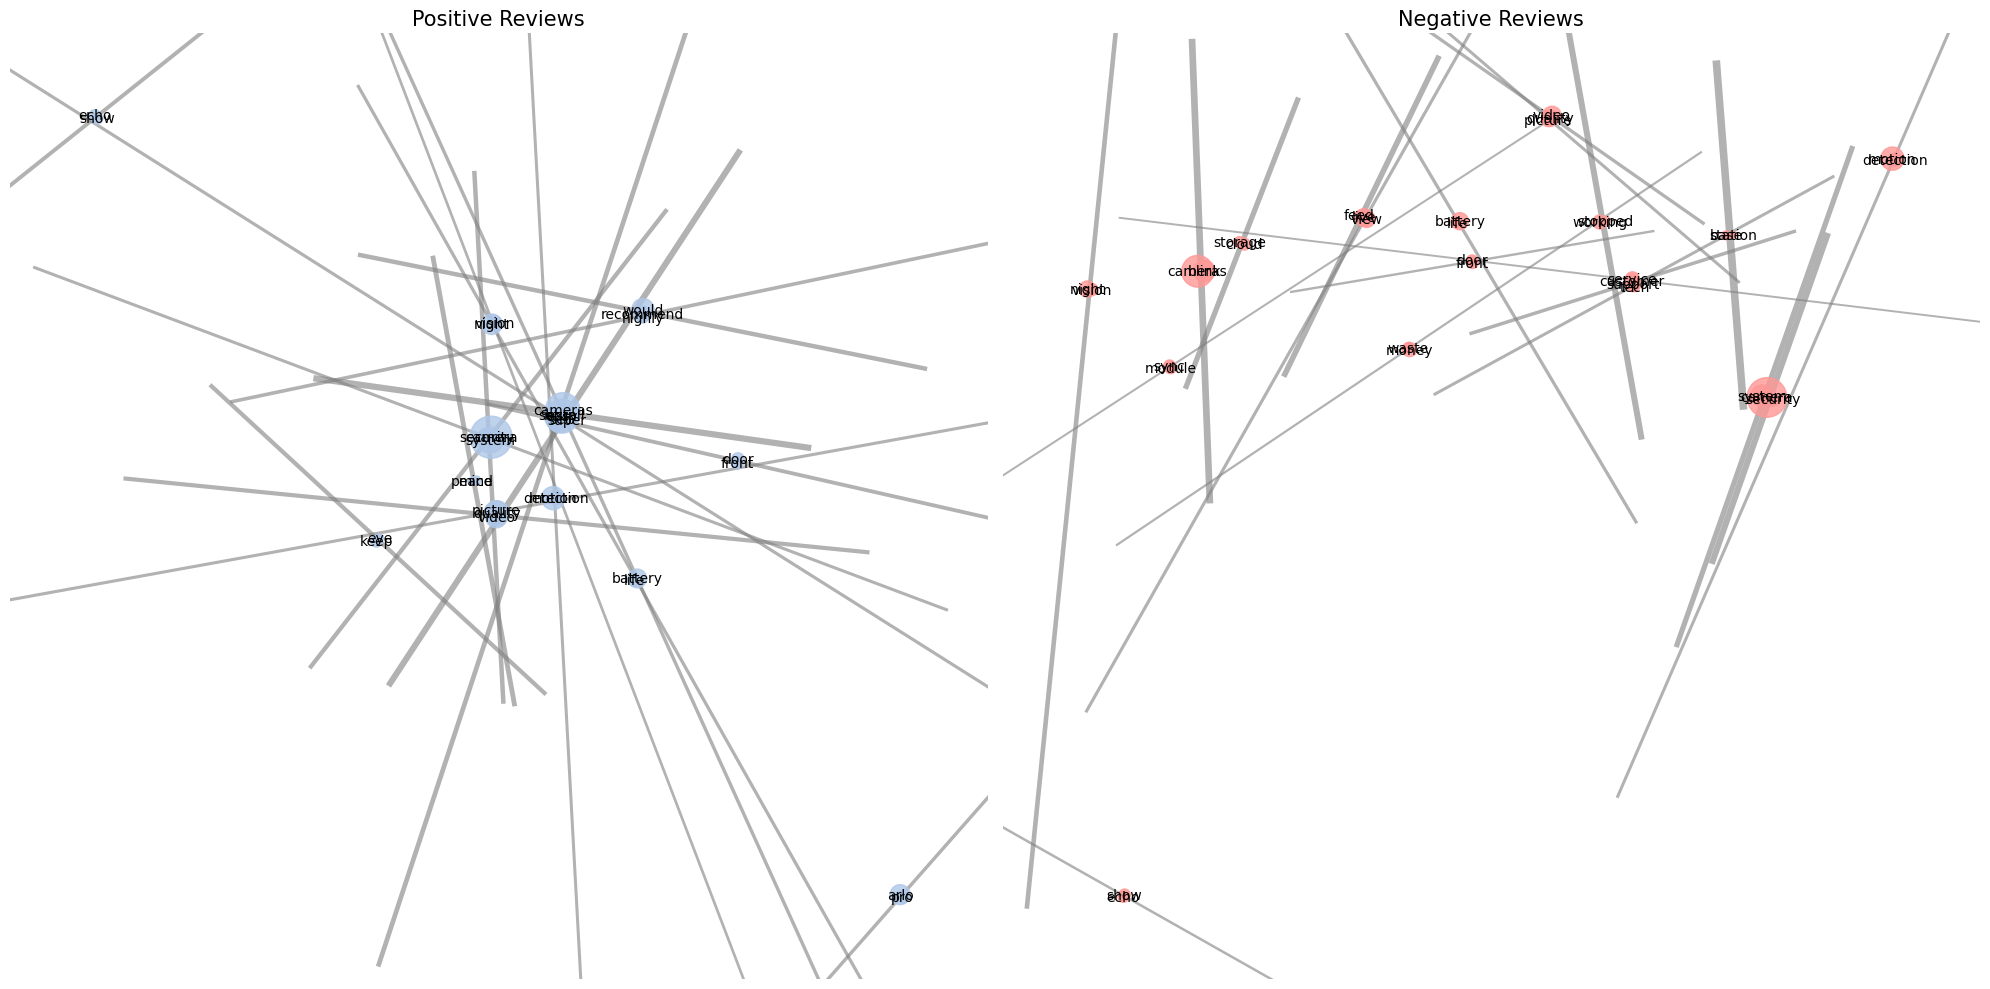


用户正面评论中最常出现的20个功能组合:
- easy set: 7213次
- easy install: 6035次
- night vision: 5851次
- motion detection: 4520次
- picture quality: 3678次
- easy setup: 3342次
- battery life: 3267次
- camera system: 2814次
- arlo pro: 2537次
- highly recommend: 2426次
- video quality: 2159次
- super easy: 1847次
- security system: 1675次
- would recommend: 1672次
- echo show: 1570次
- security camera: 1537次
- front door: 1483次
- cameras easy: 1448次
- peace mind: 1319次
- keep eye: 1316次

用户负面评论中最常出现的20个功能组合:
- motion detection: 4008次
- night vision: 3586次
- live view: 3270次
- customer service: 2980次
- sync module: 2587次
- waste money: 2033次
- battery life: 2017次
- camera system: 1530次
- picture quality: 1447次
- echo show: 1344次
- blink cameras: 1339次
- tech support: 1315次
- stopped working: 1276次
- video quality: 1079次
- front door: 1064次
- live feed: 1027次
- security camera: 1010次
- base station: 1009次
- customer support: 986次
- cloud storage: 900次


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import networkx as nx
from nltk.util import bigrams
import matplotlib.colors as mcolors
from adjustText import adjust_text  # 需要安装：pip install adjustText

# 如果是第一次运行，需要下载停用词和分词器
nltk.download('punkt_tab')
nltk.download('stopwords')

# 文本预处理函数
def preprocess_text(text):
    # 转换为小写
    text = text.lower()
    # 移除特殊字符和数字
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # 分词
    tokens = word_tokenize(text)
    # 移除停用词
    stop_words = set(stopwords.words('english'))
    # 添加产品领域特定的停用词
    product_stopwords = {'product', 'use', 'using', 'used', 'get', 'got',
                         'good', 'great', 'really', 'very', 'well', 'work',
                         'works', 'like', 'just', 'time', 'need', 'make',
                         'take', 'want', 'one', 'look', 'buy', 'also',
                         'new', 'old', 'even', 'first', 'last'}
    stop_words.update(product_stopwords)
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
    return tokens

# 提取正面和负面评论
positive_reviews = myDF[myDF['sentiment'] == 'positive']['text'].tolist()
negative_reviews = myDF[myDF['sentiment'] == 'negative']['text'].tolist()

# 分别预处理正面和负面评论
positive_tokens = []
negative_tokens = []

for review in positive_reviews:
    positive_tokens.extend(preprocess_text(str(review)))

for review in negative_reviews:
    negative_tokens.extend(preprocess_text(str(review)))

# 分别生成正面和负面bigrams
positive_bigram_list = list(bigrams(positive_tokens))
negative_bigram_list = list(bigrams(negative_tokens))

# 分别计算正面和负面bigram频率
positive_bigram_freq = Counter(positive_bigram_list)
negative_bigram_freq = Counter(negative_bigram_list)

# 分别获取前50个最常见的bigrams
positive_top_bigrams = positive_bigram_freq.most_common(20)
negative_top_bigrams = negative_bigram_freq.most_common(20)

# 分别创建正面和负面网络图
positive_G = nx.Graph()
negative_G = nx.Graph()

# 分别添加正面和负面节点和边
for bigram, freq in positive_top_bigrams:
    word1, word2 = bigram
    positive_G.add_edge(word1, word2, weight=freq)

for bigram, freq in negative_top_bigrams:
    word1, word2 = bigram
    negative_G.add_edge(word1, word2, weight=freq)

# 计算正面和负面节点的度中心性（连接数量）
positive_degree_centrality = nx.degree_centrality(positive_G)
negative_degree_centrality = nx.degree_centrality(negative_G)

# 计算正面和负面词频
positive_word_freq = Counter(positive_tokens)
negative_word_freq = Counter(negative_tokens)

# 设置正面和负面节点大小（基于度中心性和词频的组合）
positive_node_size = [((positive_degree_centrality[node] * 10) + (positive_word_freq[node] * 0.02)) for node in positive_G.nodes()]
negative_node_size = [((negative_degree_centrality[node] * 10) + (negative_word_freq[node] * 0.02)) for node in negative_G.nodes()]

# 设置正面和负面边的粗细（基于bigram频率）
positive_edge_width = [d['weight'] * 0.25 for (u, v, d) in positive_G.edges(data=True)]
negative_edge_width = [d['weight'] * 0.25 for (u, v, d) in negative_G.edges(data=True)]

# 设置正面和负面节点颜色（基于情感倾向，这里简单用统一颜色区分正负）
positive_node_colors = ['#aec7e8'] * len(positive_G.nodes())  # 浅蓝色 - 正面
negative_node_colors = ['#ff9896'] * len(negative_G.nodes())  # 浅红色 - 负面

# 创建画布，分两个子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# 绘制正面评论网络图
pos1 = nx.spring_layout(positive_G, k=0.6, iterations=150, seed=42)
nx.draw_networkx_nodes(positive_G, pos1, node_size=positive_node_size, alpha=0.8,
                       node_color=positive_node_colors, ax=ax1)
nx.draw_networkx_edges(positive_G, pos1, width=positive_edge_width, alpha=0.6,
                       edge_color='gray', ax=ax1)
nx.draw_networkx_labels(positive_G, pos1, font_size=10,  ax=ax1)
ax1.set_title('Positive Reviews', fontsize=15)
ax1.axis('off')

# 绘制负面评论网络图
pos2 = nx.spring_layout(negative_G, k=0.7, iterations=400, seed=42)
nx.draw_networkx_nodes(negative_G, pos2, node_size=negative_node_size, alpha=0.8,
                       node_color=negative_node_colors, ax=ax2)
nx.draw_networkx_edges(negative_G, pos2, width=negative_edge_width, alpha=0.6,
                       edge_color='gray', ax=ax2)
nx.draw_networkx_labels(negative_G, pos2, font_size=10,  ax=ax2)
ax2.set_title('Negative Reviews', fontsize=15)
ax2.axis('off')

plt.tight_layout()
plt.show()

# 打印前20个最常见的正面和负面bigrams
print("\n用户正面评论中最常出现的20个功能组合:")
for (word1, word2), freq in positive_top_bigrams[:20]:
    print(f"- {word1} {word2}: {freq}次")

print("\n用户负面评论中最常出现的20个功能组合:")
for (word1, word2), freq in negative_top_bigrams[:20]:
    print(f"- {word1} {word2}: {freq}次")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


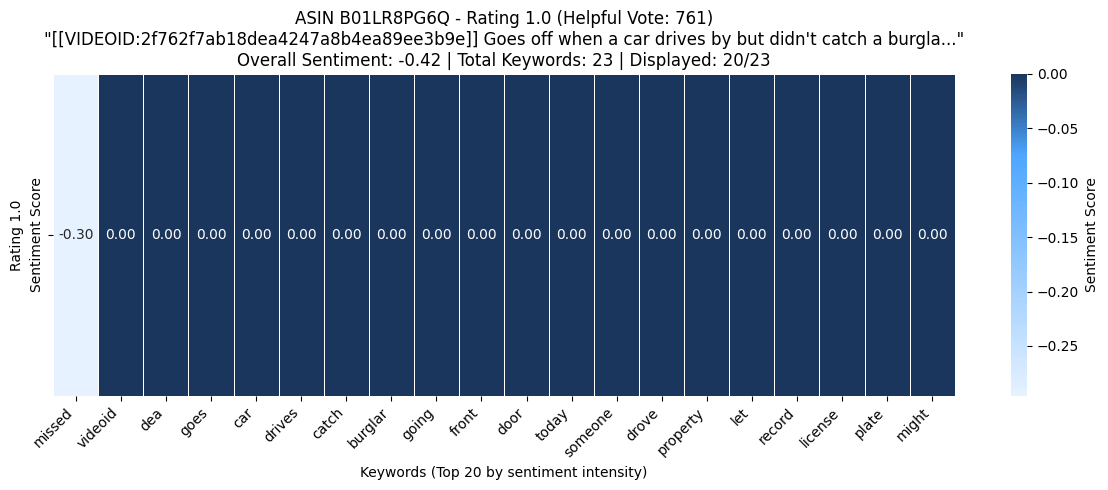


ASIN B01LR8PG6Q - Rating 1.0 关键词情感分析:
评论: [[VIDEOID:2f762f7ab18dea4247a8b4ea89ee3b9e]] Goes off when a car drives by but didn't catch a burglar going into the front door. Today someone drove u...
整体情感得分: -0.42
总关键词数: 23, 显示: 20/23

关键词情感得分:
- missed: -0.30
- videoid: 0.00
- dea: 0.00
- goes: 0.00
- car: 0.00
- drives: 0.00
- catch: 0.00
- burglar: 0.00
- going: 0.00
- front: 0.00
- door: 0.00
- today: 0.00
- someone: 0.00
- drove: 0.00
- property: 0.00
- let: 0.00
- record: 0.00
- license: 0.00
- plate: 0.00
- might: 0.00


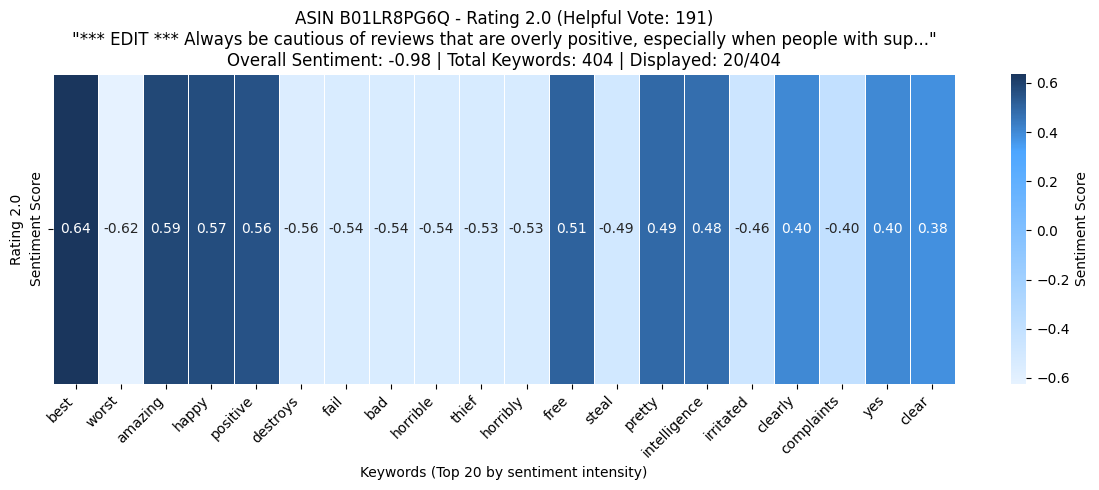


ASIN B01LR8PG6Q - Rating 2.0 关键词情感分析:
评论: *** EDIT *** Always be cautious of reviews that are overly positive, especially when people with supported evidence speak out negatively.  I received ...
整体情感得分: -0.98
总关键词数: 404, 显示: 20/404

关键词情感得分:
- best: 0.64
- worst: -0.62
- amazing: 0.59
- happy: 0.57
- positive: 0.56
- destroys: -0.56
- fail: -0.54
- bad: -0.54
- horrible: -0.54
- thief: -0.53
- horribly: -0.53
- free: 0.51
- steal: -0.49
- pretty: 0.49
- intelligence: 0.48
- irritated: -0.46
- clearly: 0.40
- complaints: -0.40
- yes: 0.40
- clear: 0.38


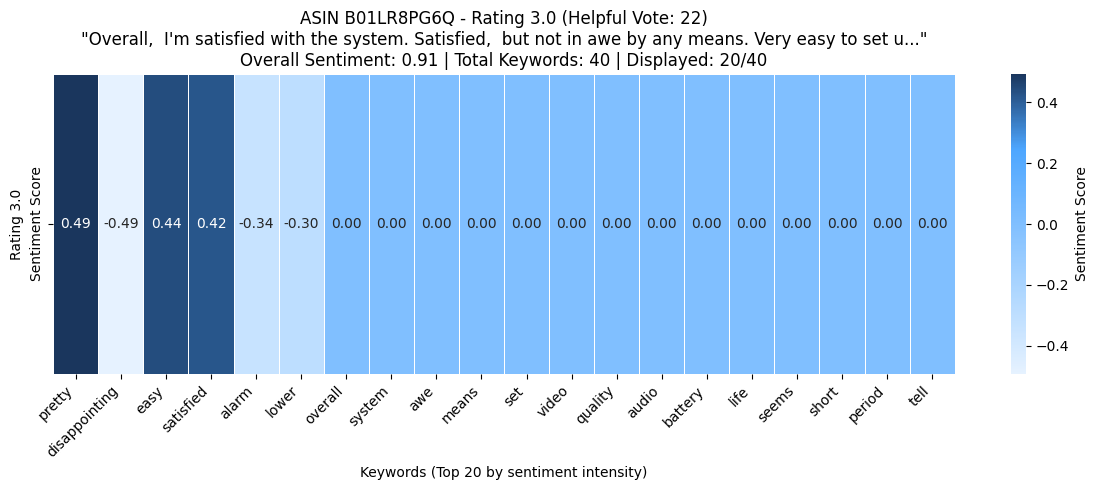


ASIN B01LR8PG6Q - Rating 3.0 关键词情感分析:
评论: Overall,  I'm satisfied with the system. Satisfied,  but not in awe by any means. Very easy to set up.  The video quality is good and so is the audio....
整体情感得分: 0.91
总关键词数: 40, 显示: 20/40

关键词情感得分:
- pretty: 0.49
- disappointing: -0.49
- easy: 0.44
- satisfied: 0.42
- alarm: -0.34
- lower: -0.30
- overall: 0.00
- system: 0.00
- awe: 0.00
- means: 0.00
- set: 0.00
- video: 0.00
- quality: 0.00
- audio: 0.00
- battery: 0.00
- life: 0.00
- seems: 0.00
- short: 0.00
- period: 0.00
- tell: 0.00


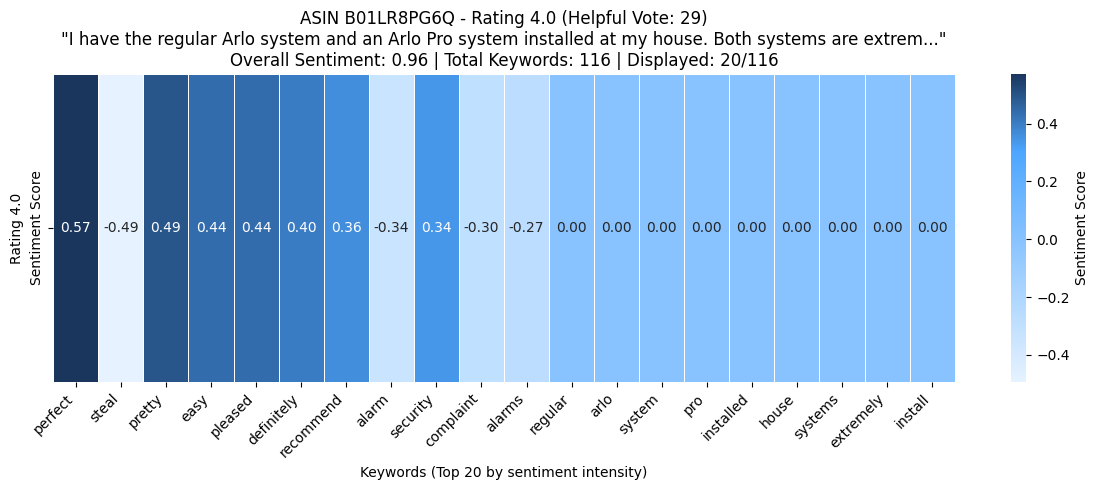


ASIN B01LR8PG6Q - Rating 4.0 关键词情感分析:
评论: I have the regular Arlo system and an Arlo Pro system installed at my house. Both systems are extremely easy to install and setup. You can have either...
整体情感得分: 0.96
总关键词数: 116, 显示: 20/116

关键词情感得分:
- perfect: 0.57
- steal: -0.49
- pretty: 0.49
- easy: 0.44
- pleased: 0.44
- definitely: 0.40
- recommend: 0.36
- alarm: -0.34
- security: 0.34
- complaint: -0.30
- alarms: -0.27
- regular: 0.00
- arlo: 0.00
- system: 0.00
- pro: 0.00
- installed: 0.00
- house: 0.00
- systems: 0.00
- extremely: 0.00
- install: 0.00


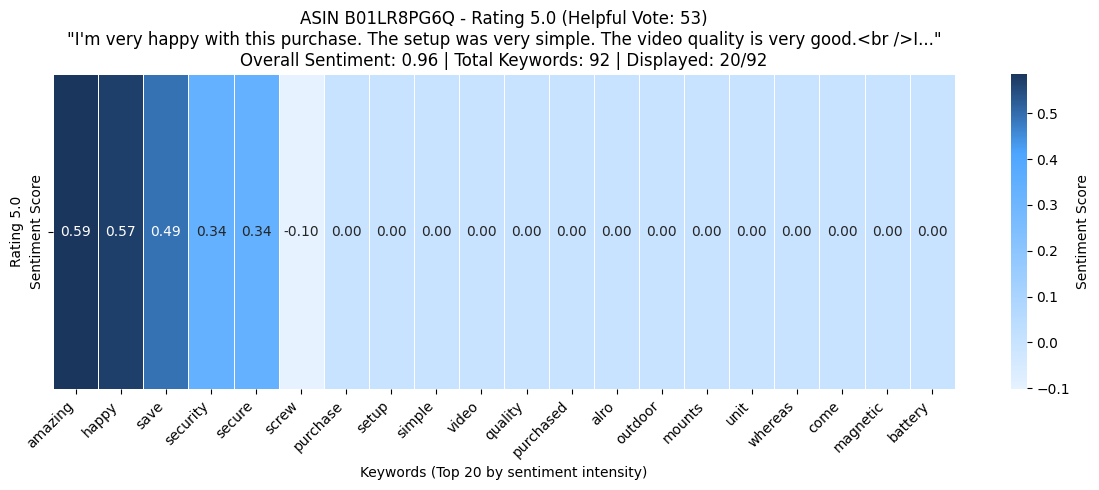


ASIN B01LR8PG6Q - Rating 5.0 关键词情感分析:
评论: I'm very happy with this purchase. The setup was very simple. The video quality is very good.<br />I also purchased the Alro outdoor security mounts b...
整体情感得分: 0.96
总关键词数: 92, 显示: 20/92

关键词情感得分:
- amazing: 0.59
- happy: 0.57
- save: 0.49
- security: 0.34
- secure: 0.34
- screw: -0.10
- purchase: 0.00
- setup: 0.00
- simple: 0.00
- video: 0.00
- quality: 0.00
- purchased: 0.00
- alro: 0.00
- outdoor: 0.00
- mounts: 0.00
- unit: 0.00
- whereas: 0.00
- come: 0.00
- magnetic: 0.00
- battery: 0.00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.colors as mcolors



# 如果是第一次运行，需要下载相关资源
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# 定义要分析的ASIN
target_asin = 'B01LR8PG6Q'

# 筛选目标ASIN的评论
target_reviews = myDF[myDF['asin'] == target_asin]

# 确保有足够的评论数据
if len(target_reviews) == 0:
    print(f"未找到ASIN为{target_asin}的评论数据")
else:
    # 文本预处理函数
    def preprocess_text(text):
        # 转换为小写
        text = text.lower()
        # 移除特殊字符和数字
        text = re.sub(r'[^a-zA-Z]', ' ', text)
        # 分词
        tokens = word_tokenize(text)
        # 移除停用词
        stop_words = set(stopwords.words('english'))
        # 添加相机领域特定的停用词
        camera_stopwords = {'camera', 'cameras', 'photo', 'photos', 'picture', 'pictures',
                           'device', 'product', 'use', 'using', 'used', 'get', 'got',
                           'good', 'great', 'really', 'very', 'well', 'work', 'works',
                           'like', 'just', 'time', 'need', 'make', 'take', 'want', 'one',
                           'look', 'buy', 'also', 'new', 'old', 'even', 'first', 'last',
                           'thing', 'much', 'still', 'however', 'although', 'bit', 'find',
                           'seem', 'way', 'every', 'would', 'could', 'really'}
        stop_words.update(camera_stopwords)
        tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
        return tokens

    # 情感分析器
    sia = SentimentIntensityAnalyzer()

    # 为每个评分(1-5)生成热图
    for rating in range(1, 6):
        # 筛选该评分的评论，并按help_vote排序
        rating_reviews = target_reviews[target_reviews['rating'] == rating].sort_values(
            'helpful_vote', ascending=False)

        # 确保该评分有评论
        if len(rating_reviews) == 0:
            print(f"未找到评分为{rating}.0的评论数据")
            continue

        # 获取help_vote最高的评论
        top_review = rating_reviews.iloc[0]
        top_review_text = top_review['text']

        # 预处理评论
        processed_tokens = preprocess_text(top_review_text)

        # 计算整个句子的情感得分
        sentiment_score = sia.polarity_scores(top_review_text)['compound']

        # 计算每个关键词的情感贡献
        keyword_sentiments = {}
        for token in processed_tokens:
            # 计算单个词的情感得分
            word_sentiment = sia.polarity_scores(token)['compound']
            keyword_sentiments[token] = word_sentiment

        # 如果关键词数量超过20，选择情感得分绝对值最高的20个
        if len(keyword_sentiments) > 20:
            sorted_keywords = sorted(keyword_sentiments.items(),
                                    key=lambda x: abs(x[1]), reverse=True)
            top_keywords = dict(sorted_keywords[:20])
        else:
            top_keywords = keyword_sentiments

        # 创建自定义颜色映射（从红色到绿色）
        custom_cmap = mcolors.LinearSegmentedColormap.from_list(
            "custom蓝",
    ["#E6F2FF", "#B3D9FF", "#80BFFF", "#4DA6FF", "#1A365D"]  # 红色-黄色-绿色
        )

        # 转换为DataFrame（转置以获得垂直布局）
        heatmap_df = pd.DataFrame(top_keywords.values(),
                                 index=top_keywords.keys(),
                                 columns=['Sentiment Score']).T

        # 创建画布
        plt.figure(figsize=(12, 5))

        # 绘制热图
        ax = sns.heatmap(heatmap_df, annot=True, cmap=custom_cmap, fmt='.2f',
                        linewidths=.5, cbar_kws={'label': 'Sentiment Score'})

        # 设置标题和轴标签
        title = (f'ASIN {target_asin} - Rating {rating}.0 (Helpful Vote: {top_review["helpful_vote"]})\n'
                f'"{top_review_text[:100]}..."\n'
                f'Overall Sentiment: {sentiment_score:.2f} | '
                f'Total Keywords: {len(processed_tokens)} | '
                f'Displayed: {len(top_keywords)}/{len(processed_tokens)}')

        plt.title(title, fontsize=12)
        plt.xlabel('Keywords (Top 20 by sentiment intensity)', fontsize=10)
        plt.ylabel(f'Rating {rating}.0', fontsize=10)

        # 旋转x轴标签以便更好显示
        plt.xticks(rotation=45, ha='right')

        # 调整布局
        plt.tight_layout()

        # 显示图形
        plt.show()

        # 打印关键词情感分析结果
        print(f"\nASIN {target_asin} - Rating {rating}.0 关键词情感分析:")
        print(f"评论: {top_review_text[:150]}...")
        print(f"整体情感得分: {sentiment_score:.2f}")
        print(f"总关键词数: {len(processed_tokens)}, 显示: {len(top_keywords)}/{len(processed_tokens)}")
        print("\n关键词情感得分:")
        for keyword, score in sorted(top_keywords.items(), key=lambda x: -abs(x[1])):
            print(f"- {keyword}: {score:.2f}")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


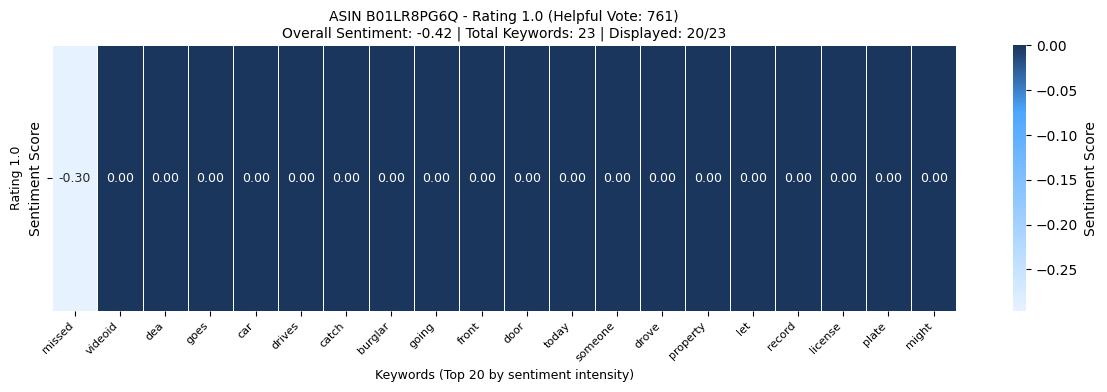


ASIN B01LR8PG6Q - Rating 1.0 关键词情感分析:
评论: [[VIDEOID:2f762f7ab18dea4247a8b4ea89ee3b9e]] Goes off when a car drives by but didn't catch a burglar going into the front door. Today someone drove u...
整体情感得分: -0.42
总关键词数: 23, 显示: 20/23

关键词情感得分:
- missed: -0.30
- videoid: 0.00
- dea: 0.00
- goes: 0.00
- car: 0.00
- drives: 0.00
- catch: 0.00
- burglar: 0.00
- going: 0.00
- front: 0.00
- door: 0.00
- today: 0.00
- someone: 0.00
- drove: 0.00
- property: 0.00
- let: 0.00
- record: 0.00
- license: 0.00
- plate: 0.00
- might: 0.00


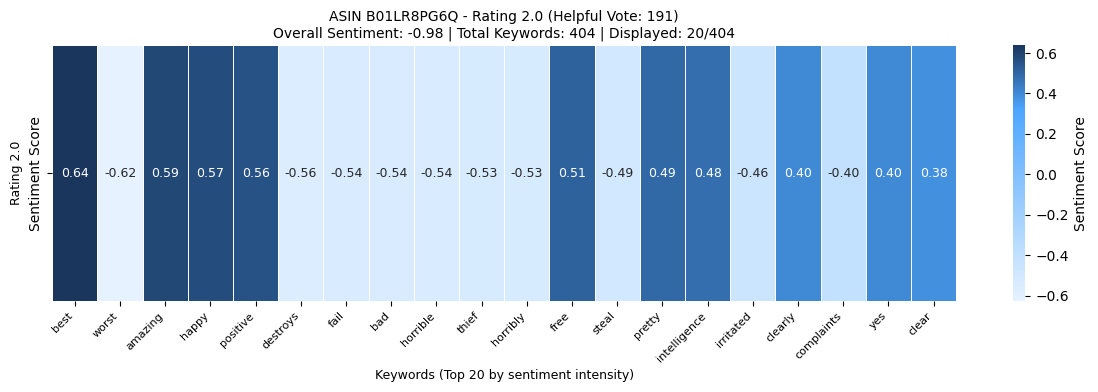


ASIN B01LR8PG6Q - Rating 2.0 关键词情感分析:
评论: *** EDIT *** Always be cautious of reviews that are overly positive, especially when people with supported evidence speak out negatively.  I received ...
整体情感得分: -0.98
总关键词数: 404, 显示: 20/404

关键词情感得分:
- best: 0.64
- worst: -0.62
- amazing: 0.59
- happy: 0.57
- positive: 0.56
- destroys: -0.56
- fail: -0.54
- bad: -0.54
- horrible: -0.54
- thief: -0.53
- horribly: -0.53
- free: 0.51
- steal: -0.49
- pretty: 0.49
- intelligence: 0.48
- irritated: -0.46
- clearly: 0.40
- complaints: -0.40
- yes: 0.40
- clear: 0.38


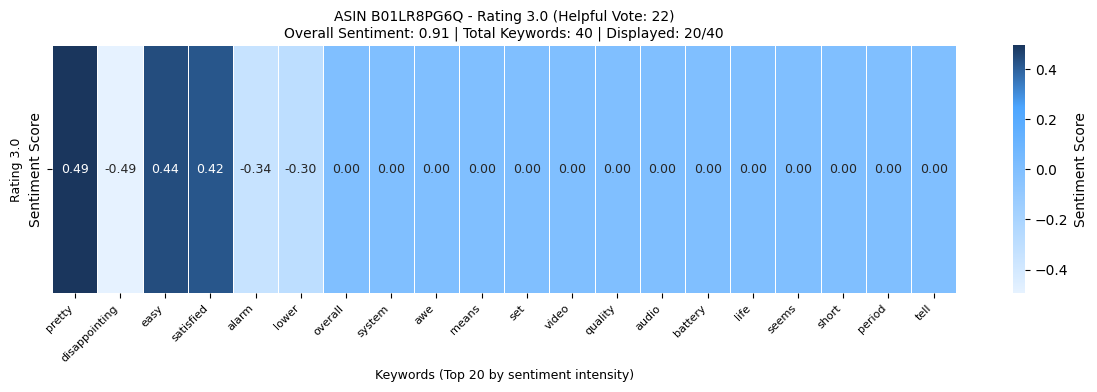


ASIN B01LR8PG6Q - Rating 3.0 关键词情感分析:
评论: Overall,  I'm satisfied with the system. Satisfied,  but not in awe by any means. Very easy to set up.  The video quality is good and so is the audio....
整体情感得分: 0.91
总关键词数: 40, 显示: 20/40

关键词情感得分:
- pretty: 0.49
- disappointing: -0.49
- easy: 0.44
- satisfied: 0.42
- alarm: -0.34
- lower: -0.30
- overall: 0.00
- system: 0.00
- awe: 0.00
- means: 0.00
- set: 0.00
- video: 0.00
- quality: 0.00
- audio: 0.00
- battery: 0.00
- life: 0.00
- seems: 0.00
- short: 0.00
- period: 0.00
- tell: 0.00


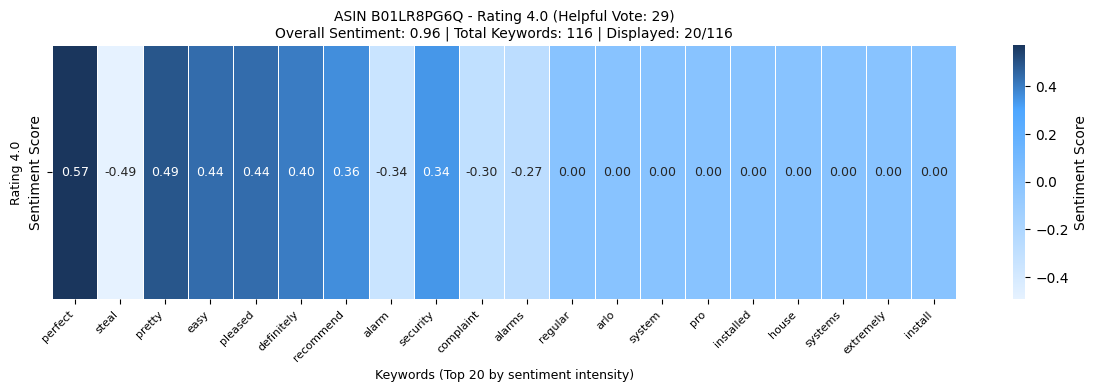


ASIN B01LR8PG6Q - Rating 4.0 关键词情感分析:
评论: I have the regular Arlo system and an Arlo Pro system installed at my house. Both systems are extremely easy to install and setup. You can have either...
整体情感得分: 0.96
总关键词数: 116, 显示: 20/116

关键词情感得分:
- perfect: 0.57
- steal: -0.49
- pretty: 0.49
- easy: 0.44
- pleased: 0.44
- definitely: 0.40
- recommend: 0.36
- alarm: -0.34
- security: 0.34
- complaint: -0.30
- alarms: -0.27
- regular: 0.00
- arlo: 0.00
- system: 0.00
- pro: 0.00
- installed: 0.00
- house: 0.00
- systems: 0.00
- extremely: 0.00
- install: 0.00


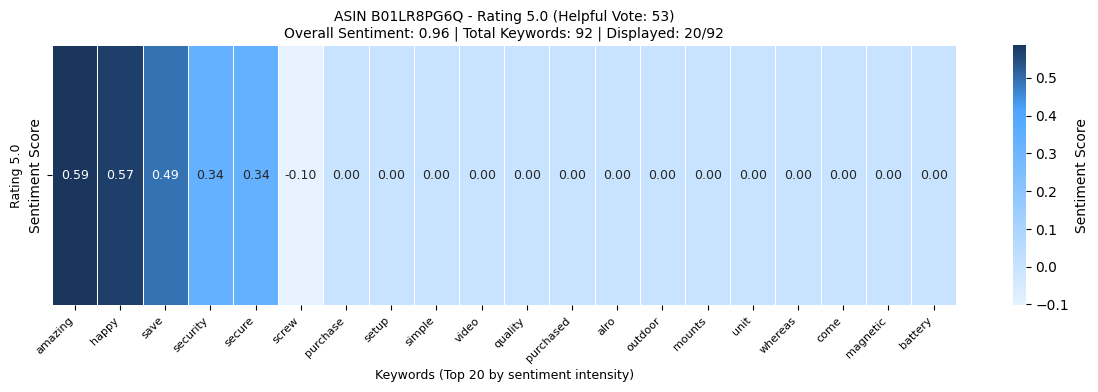


ASIN B01LR8PG6Q - Rating 5.0 关键词情感分析:
评论: I'm very happy with this purchase. The setup was very simple. The video quality is very good.<br />I also purchased the Alro outdoor security mounts b...
整体情感得分: 0.96
总关键词数: 92, 显示: 20/92

关键词情感得分:
- amazing: 0.59
- happy: 0.57
- save: 0.49
- security: 0.34
- secure: 0.34
- screw: -0.10
- purchase: 0.00
- setup: 0.00
- simple: 0.00
- video: 0.00
- quality: 0.00
- purchased: 0.00
- alro: 0.00
- outdoor: 0.00
- mounts: 0.00
- unit: 0.00
- whereas: 0.00
- come: 0.00
- magnetic: 0.00
- battery: 0.00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.colors as mcolors



# 如果是第一次运行，需要下载相关资源
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# 定义要分析的ASIN
target_asin = 'B01LR8PG6Q'

# 筛选目标ASIN的评论
target_reviews = myDF[myDF['asin'] == target_asin]

# 确保有足够的评论数据
if len(target_reviews) == 0:
    print(f"未找到ASIN为{target_asin}的评论数据")
else:
    # 文本预处理函数
    def preprocess_text(text):
        # 转换为小写
        text = text.lower()
        # 移除特殊字符和数字
        text = re.sub(r'[^a-zA-Z]', ' ', text)
        # 分词
        tokens = word_tokenize(text)
        # 移除停用词
        stop_words = set(stopwords.words('english'))
        # 添加相机领域特定的停用词
        camera_stopwords = {'camera', 'cameras', 'photo', 'photos', 'picture', 'pictures',
                           'device', 'product', 'use', 'using', 'used', 'get', 'got',
                           'good', 'great', 'really', 'very', 'well', 'work', 'works',
                           'like', 'just', 'time', 'need', 'make', 'take', 'want', 'one',
                           'look', 'buy', 'also', 'new', 'old', 'even', 'first', 'last',
                           'thing', 'much', 'still', 'however', 'although', 'bit', 'find',
                           'seem', 'way', 'every', 'would', 'could', 'really'}
        stop_words.update(camera_stopwords)
        tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
        return tokens

    # 情感分析器
    sia = SentimentIntensityAnalyzer()

    # 为每个评分(1-5)生成热图
    for rating in range(1, 6):
        # 筛选该评分的评论，并按help_vote排序
        rating_reviews = target_reviews[target_reviews['rating'] == rating].sort_values(
            'helpful_vote', ascending=False)

        # 确保该评分有评论
        if len(rating_reviews) == 0:
            print(f"未找到评分为{rating}.0的评论数据")
            continue

        # 获取help_vote最高的评论
        top_review = rating_reviews.iloc[0]
        top_review_text = top_review['text']

        # 预处理评论
        processed_tokens = preprocess_text(top_review_text)

        # 计算整个句子的情感得分
        sentiment_score = sia.polarity_scores(top_review_text)['compound']

        # 计算每个关键词的情感贡献
        keyword_sentiments = {}
        for token in processed_tokens:
            # 计算单个词的情感得分
            word_sentiment = sia.polarity_scores(token)['compound']
            keyword_sentiments[token] = word_sentiment

        # 如果关键词数量超过20，选择情感得分绝对值最高的20个
        if len(keyword_sentiments) > 20:
            sorted_keywords = sorted(keyword_sentiments.items(),
                                    key=lambda x: abs(x[1]), reverse=True)
            top_keywords = dict(sorted_keywords[:20])
        else:
            top_keywords = keyword_sentiments

        # 创建自定义颜色映射（从红色到绿色）
        custom_cmap = mcolors.LinearSegmentedColormap.from_list(
            "custom蓝",
    ["#E6F2FF", "#B3D9FF", "#80BFFF", "#4DA6FF", "#1A365D"]
        )

        # 转换为DataFrame（转置以获得垂直布局）
        heatmap_df = pd.DataFrame(top_keywords.values(),
                                 index=top_keywords.keys(),
                                 columns=['Sentiment Score']).T

        # 调整画布大小
        fig_width = min(12, len(top_keywords) * 0.6)  # 根据关键词数量动态调整宽度
        plt.figure(figsize=(fig_width, 4))  # 减小高度，整体更加紧凑

        # 绘制热图，调整字体大小
        ax = sns.heatmap(heatmap_df, annot=True, cmap=custom_cmap, fmt='.2f',
                        linewidths=.5, cbar_kws={'label': 'Sentiment Score'},
                        annot_kws={'size': 9})  # 减小注释字体大小

        # 设置标题和轴标签，调整字体大小
        title = (f'ASIN {target_asin} - Rating {rating}.0 (Helpful Vote: {top_review["helpful_vote"]})\n'
                f'Overall Sentiment: {sentiment_score:.2f} | '
                f'Total Keywords: {len(processed_tokens)} | '
                f'Displayed: {len(top_keywords)}/{len(processed_tokens)}')

        plt.title(title, fontsize=10)  # 减小标题字体大小
        plt.xlabel('Keywords (Top 20 by sentiment intensity)', fontsize=9)  # 减小x轴标签字体大小
        plt.ylabel(f'Rating {rating}.0', fontsize=9)  # 减小y轴标签字体大小

        # 旋转x轴标签以便更好显示，调整字体大小
        plt.xticks(rotation=45, ha='right', fontsize=8)  # 减小x轴刻度字体大小

        # 调整布局，增加紧凑度
        plt.tight_layout(pad=1.0)  # 减小边距

        # 显示图形
        plt.show()

        # 打印关键词情感分析结果
        print(f"\nASIN {target_asin} - Rating {rating}.0 关键词情感分析:")
        print(f"评论: {top_review_text[:150]}...")
        print(f"整体情感得分: {sentiment_score:.2f}")
        print(f"总关键词数: {len(processed_tokens)}, 显示: {len(top_keywords)}/{len(processed_tokens)}")
        print("\n关键词情感得分:")
        for keyword, score in sorted(top_keywords.items(), key=lambda x: -abs(x[1])):
            print(f"- {keyword}: {score:.2f}")

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import bigrams
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from collections import Counter

# 设置中文字体
# 这里plotly在显示中文时，一般在绘图时指定字体即可，不需要像matplotlib那样设置全局字体
# 如果有特殊情况，可参考plotly官方文档设置

# 如果是第一次运行，需要下载相关资源
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('vader_lexicon')



# 文本预处理函数
def preprocess_text(text):
    # 转换为小写
    text = text.lower()
    # 移除特殊字符和数字
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # 分词
    tokens = word_tokenize(text)
    # 移除停用词
    stop_words = set(stopwords.words('english'))
    # 添加相机领域特定的停用词（可根据实际情况调整）
    camera_stopwords = {'camera', 'cameras', 'photo', 'photos', 'picture', 'pictures',
                        'device', 'product', 'use', 'using', 'used', 'get', 'got',
                        'good', 'great', 'really', 'very', 'well', 'work', 'works',
                        'like', 'just', 'time', 'need', 'make', 'take', 'want',
                        'look', 'buy', 'also', 'new', 'old', 'even', 'first', 'last',
                        'thing', 'much', 'still', 'however', 'although', 'bit', 'find',
                        'seem', 'way', 'every', 'would', 'could', 'really'}
    stop_words.update(camera_stopwords)
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
    return tokens

# 情感分析器
sia = SentimentIntensityAnalyzer()

# 分别收集positive和negative评论
myDF['sentiment'] = myDF['text'].apply(lambda x: 'positive' if sia.polarity_scores(x)['compound'] >= 0 else 'negative')
positive_reviews = myDF[myDF['sentiment'] == 'positive']['text'].tolist()
negative_reviews = myDF[myDF['sentiment'] == 'negative']['text'].tolist()

# 提取positive和negative评论中的bigrams
def extract_bigrams(reviews):
    all_bigrams = []
    for review in reviews:
        tokens = preprocess_text(str(review))
        # 提取bigrams
        bg = list(bigrams(tokens))
        # 将bigrams转换为字符串
        all_bigrams.extend([' '.join(b) for b in bg])
    return all_bigrams

# 提取positive和negative bigrams
positive_bigrams = extract_bigrams(positive_reviews)
negative_bigrams = extract_bigrams(negative_reviews)

# 计算bigram频率
positive_freq = Counter(positive_bigrams)
negative_freq = Counter(negative_bigrams)

# 获取最常见的bigrams（这里取前20个）
top_positive = positive_freq.most_common(20)
top_negative = negative_freq.most_common(20)

# 构建桑基图数据
def build_sankey_data(bigrams_data):
    source_nodes = []
    target_nodes = []
    values = []
    all_nodes = []
    node_mapping = {}
    node_index = 0

    for bigram, freq in bigrams_data:
        word1, word2 = bigram.split()
        if word1 not in node_mapping:
            node_mapping[word1] = node_index
            all_nodes.append(word1)
            node_index += 1
        if word2 not in node_mapping:
            node_mapping[word2] = node_index
            all_nodes.append(word2)
            node_index += 1
        source_nodes.append(node_mapping[word1])
        target_nodes.append(node_mapping[word2])
        values.append(freq)

    return source_nodes, target_nodes, values, all_nodes

# 绘制桑基图
def draw_sankey(source, target, value, labels, title):
    fig = go.Figure(data=[go.Sankey(
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(color = "#1A365D", width = 0.5),
          label = labels,
          color = "#1A365D",
        ),
        link = dict(
          source = source,
          target = target,
          value = value
      ))])
    fig.update_layout(title_text=title, font_size=10)
    fig.show()

# 绘制positive桑基图
source_pos, target_pos, value_pos, labels_pos = build_sankey_data(top_positive)
draw_sankey(source_pos, target_pos, value_pos, labels_pos, 'Positive Conditional Bigrams Sankey Diagram')

# 绘制negative桑基图
source_neg, target_neg, value_neg, labels_neg = build_sankey_data(top_negative)
draw_sankey(source_neg, target_neg, value_neg, labels_neg, 'Negative Conditional Bigrams Sankey Diagram')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


ValueError: Invalid property specified for object of type plotly.graph_objs.sankey.node.Line: 'size'

Did you mean "width"?

    Valid properties:
        color
            Sets the color of the `line` around each `node`.
        colorsrc
            Sets the source reference on Chart Studio Cloud for
            `color`.
        width
            Sets the width (in px) of the `line` around each
            `node`.
        widthsrc
            Sets the source reference on Chart Studio Cloud for
            `width`.
        
Did you mean "width"?

Bad property path:
size
^^^^